### __Group Assignment - Predicting Airbnb Listing Prices in Melbourne, Australia__

---

**Kaggle Competition Ends:** Friday, 6 June 2025 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 6 June 2025 @ 11.55pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:**

- Form a team of 3 students
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here**
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

### <span style="background-color: yellow;">**Fill out the following information**

- Team Name on Kaggle: `BUSA8001_TheOutliers:))`
- Team Leader and Team Member 1: `Khuat Son Tra Nguyen - 48144134`
- Team Member 2: `Quoc Trung Nguyen - 48299405`
- Team Member 3: `Do Minh Huu Nguyen - 47772360`

---

## Task 1: Problem Description and Initial Data Analysis

**Total Marks: 9**   

Student in charge of this task: `(Quoc Trung Nguyen - StudentID: 48299405)`

In [ ]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import libarby for geopandas: pip install geopandas contextily shapely --user

c:\Users\Trung\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


****Task 1, Question 1: Forecasting Problem****

This project aims to develop a machine learning model to predict the housing price of Airbnb listings in Melbourne based on property features. The goal is to train the model using a labelled dataset and apply it to ptrdict prices for unseen listings with high accuracy.

In real-world use, hosts, as key stakeholders, can rely on the model to set data-driven prices, reducing the risk of underpricing (lost revenue) or overpricing (fewer bookings), particularly helpful for new or inexperienced hosts. Guests, another key stakeholder group, can use predicted prices as a benchmark to assess whether a listing is fairly priced, enabling smarter booking decisions. The model could also enhance Airbnb’s Smart Pricing system by improving price transparency and algorithmic accuracy.

****Task 1, Question 2: Evaluation criteria****

This project evaluates model accuracy using **Mean Absolute Error (MAE)**, which measures the average absolute difference between the predicted and actual prices. The formulas as below:

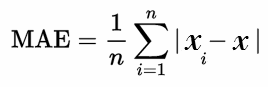

- **Advantages:**
    - Easy to interpret: provides a clear, dollar-based measure of prediction error, making it accessible to non-technical stakeholders.
    - Consistent scaling: treat all errors equally, regardless of the property's price.
    - Reduced sensitivity to outliers: avoid being overly influenced by a small number of unusually high-priced listings.

- **Limitations:**
    - Equal weighting of all errors: weight large error on a premium listing the same as a similar-sized error on a lower-segment property, even though the impact may differ.
    - No relative context: does not reflect the size of the error relative to the actual price.

****Task 1, Question 3: Categorise Variables****

| Variable Type | Number of Features | Feature Names |
|:-------------:|:-----------------:|:--------------|
| Numerical     |        37         | host_response_rate<br>host_acceptance_rate<br>host_listings_count<br>latitude<br>longitude<br>accommodates<br>bathrooms<br>bedrooms<br>beds<br>minimum_nights<br>maximum_nights<br>minimum_minimum_nights<br>maximum_minimum_nights<br>minimum_maximum_nights<br>maximum_maximum_nights<br>minimum_nights_avg_ntm<br>maximum_nights_avg_ntm<br>availability_30<br>availability_60<br>availability_90<br>availability_365<br>number_of_reviews<br>number_of_reviews_ltm<br>number_of_reviews_l30d<br>review_scores_rating<br>review_scores_accuracy<br>review_scores_cleanliness<br>review_scores_checkin<br>review_scores_communication<br>review_scores_location<br>review_scores_value<br>calculated_host_listings_count<br>calculated_host_listings_count_entire_homes<br>calculated_host_listings_count_private_rooms<br>calculated_host_listings_count_shared_rooms<br>reviews_per_month |
| Ordinal       |         2         | host_response_time<br>room_type |
| Nominal       |         7         | host_is_superhost<br>host_verifications<br>host_has_profile_pic<br>host_identity_verified<br>property_type<br>has_availability<br>instant_bookable |
| Text          |        10         | source<br>name<br>description<br>neighborhood_overview<br>host_name<br>host_location<br>host_about<br>host_neighbourhood<br>neighbourhood<br>neighbourhood_cleansed<br>amenities |
| Date          |         3         | host_since<br>first_review<br>last_review |


> **Note**: The variables `ID` and `price` are not included in the table above. `ID` is a unique identifier, while `price` is the target variable and is treated separately. Although `price` appears as text in its raw form (eg. $132.00), it will be converted to a numerical type for modeling purposes.

****Task 1, Question 4: Missing values****

In [ ]:
# Load train and test sets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Summarise missing values
def missing_summary(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    percent = (missing / len(df)) * 100
    return pd.DataFrame({
        f'{name}_Missing': missing,
        f'{name}_Missing(%)': percent.round(2)
    })

# Generate missing value summaries
train_missing = missing_summary(train, "Train")
test_missing = missing_summary(test, "Test")

# Combine summaries
missing_df = pd.concat([train_missing, test_missing], axis=1)

# Drop rows with all missing values (feature not missing in either set)
missing_df = missing_df.dropna(how="all")

# Display
missing_df.style.set_caption("Missing Values Summary").format(precision=2)

,Train_Missing,Train_Missing(%),Test_Missing,Test_Missing(%)
host_neighbourhood,3460.00,49.43,2066.00,68.87
host_about,2270.00,32.43,1441.00,48.03
neighbourhood,1823.00,26.04,1424.00,47.47
neighborhood_overview,1823.00,26.04,1424.00,47.47
host_location,1280.00,18.29,770.00,25.67
bedrooms,378.00,5.40,60.00,2.00
room_type,134.00,1.91,41.00,1.37
neighbourhood_cleansed,108.00,1.54,42.00,1.40
property_type,84.00,1.20,39.00,1.30
beds,72.00,1.03,12.00,0.40


The dataset contains several features with missing values in both the training and test sets, though the degree of missingness varies.

- **High missing rate**: The ***location-related field*** shows substantial missingness. `host_neighbourhood` is missing in nearly half of the training set (49.43%) and over two-thirds of the test set (68.87%). Particularly, `neighbourhood` and `neighborhood_overview` show more than 47% in test set.

- **Moderate missing rate**: Variables such as `bedrooms`, and `host_acceptance_rate` exhibit moderate levels of missingness, ranging from 0.9% to around 25%, with `host_location` missing in about 18.29% of the training set and 25.67% of the test set.

- **Low missing rate**: Most numerical and review-based features have low missing (under 1% in train set and 10% in test set), making them manageable for imputation or cleaning.

****Task 1, Question 5: Univariate data characteristics in training set****


**Question 5.1:** Exploring target variable (`price`)
- In this part, I applied a logarithmic transformation to the price variable. The original price values exhibit a highly skewed and diverse range. Applying the log transformation helps normalise the distribution, making it easier to identify underlying trends and outliers in the data.

***Price Distribution***:

,count,mean,std,min,25%,50%,75%,max
price,7000.0,285.65,2325.45,25.0,117.0,172.0,268.0,145160.0


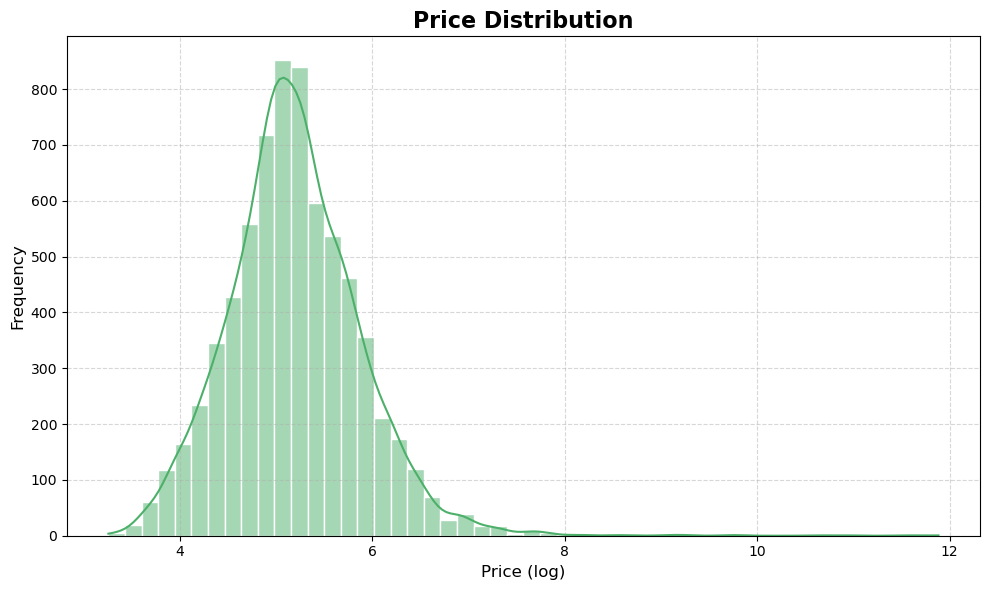

,Price(log),Original Price
0,4,53.60
1,5,147.41
2,6,402.43


In [ ]:
# Transform 'price' to numeric
train['price'] = train['price'].str.replace(r'[\$,]', '', regex=True).astype(float)
# Log-transform price (use log1p to handle extreme values for visualisaion)
train['price_log'] = np.log1p(train['price'])

# Summary table
summary = train['price'].describe()
summary_table = pd.DataFrame(summary).T.round(2)
display(summary_table)

# Price histogram
plt.figure(figsize=(10, 6))
sns.histplot(train['price_log'], bins=50, kde=True, color="#4CB06A", edgecolor='white')
plt.title('Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Price (log)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Log-transformed prices
log_prices = [4, 5, 6]
original_prices = np.expm1(log_prices)

# Create a table
price_table = pd.DataFrame({
    'Price(log)': log_prices,
    'Original Price': original_prices.round(2)
})

display(price_table)

- ****Observation:****
    - The price distribution shows that most listings fall within a moderate price range, range from $54 to $402. While a few listings reach extreme values, these are rare. Overall, the distribution highlights a strong concentration of affordable to mid-range listings.
    ---

***Listing Prices Across Melbourne***:

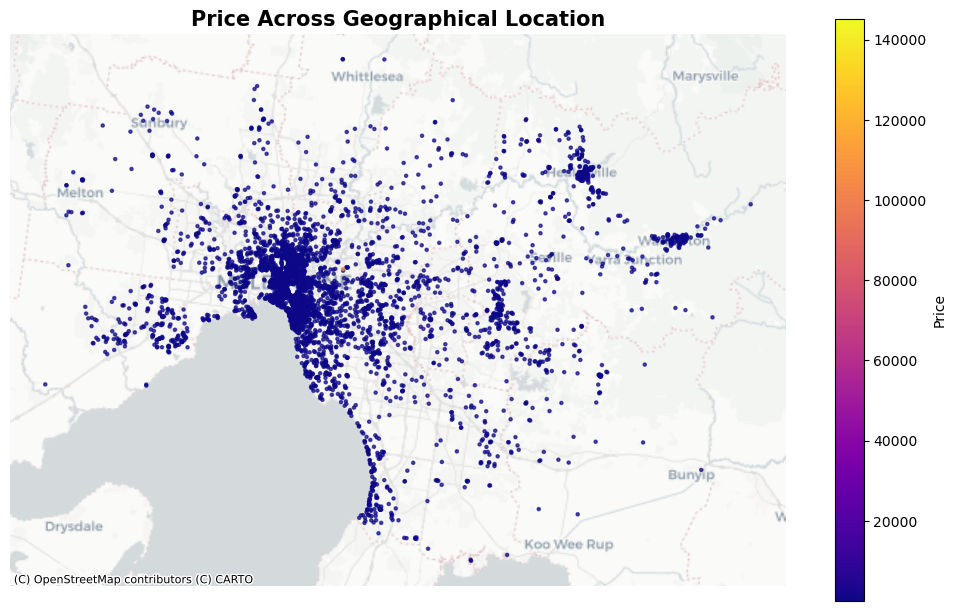

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Convert train to GeoDataFrame
geometry = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]
gdf = gpd.GeoDataFrame(train, geometry=geometry, crs='EPSG:4326')  # WGS 84

# Convert coordinates to Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot prices using color gradient
gdf.plot(
    ax=ax,
    column='price',
    cmap='plasma',
    markersize=5,
    alpha=0.7,
    legend=True,
    legend_kwds={'label': "Price", 'shrink': 0.6}
)

# Add basemap from Carto
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Clean styling
ax.set_title("Price Across Geographical Location", fontsize=15, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

- **Observation**: The map highlights a **high concentration** of listings in Melbourne’s central, southern, and southeastern suburbs. In contrast, western and outer northern suburbs, like Melton and Whittlesea, have significantly fewer listings. Most listings appear in the lower price range, as indicated by the darker points dominating the map, with only a few rare high-priced listings.

    ---

**Task 1, Question 5.2: Explore Features**

***Property Type and Room Type***:

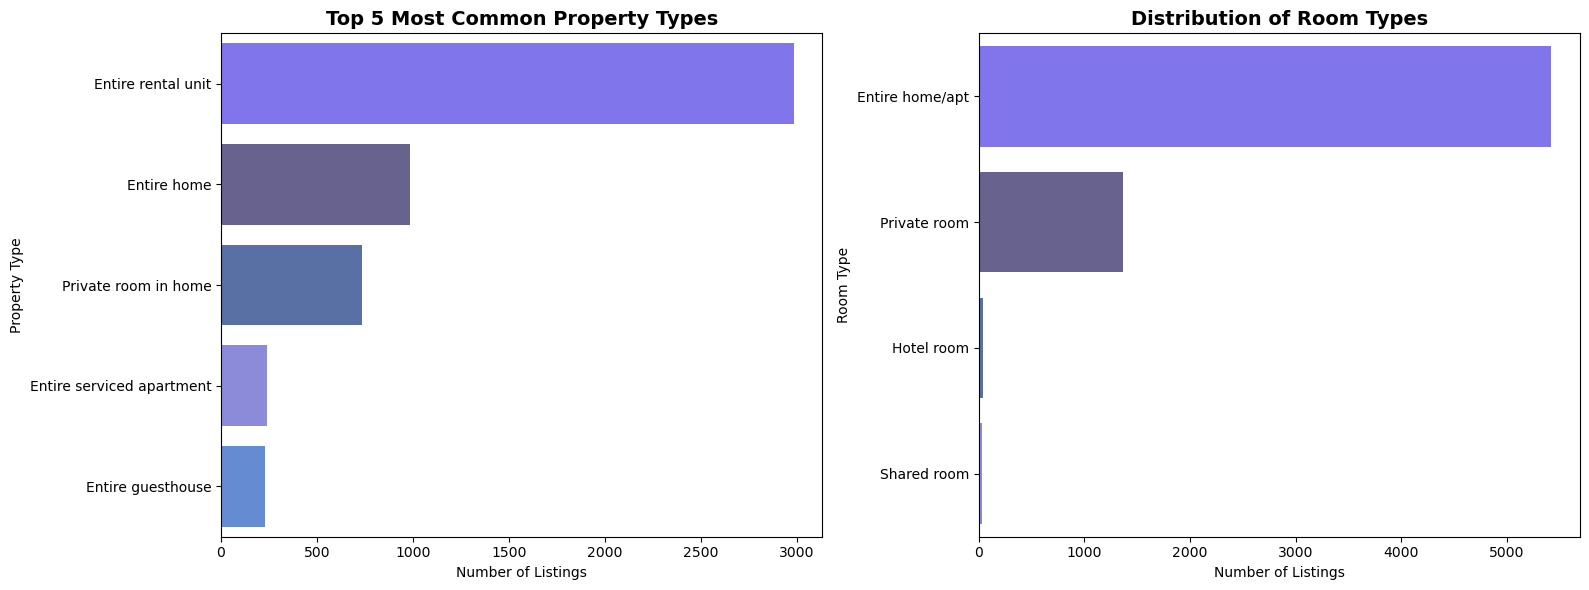

In [ ]:
# Property type and Room type

# Prepare top 5 property types
top_property = train['property_type'].value_counts().head(5).reset_index()
top_property.columns = ['Property Type', 'Count']

# Prepare room type (excluding missing)
room_counts = train['room_type'].dropna().value_counts().reset_index()
room_counts.columns = ['Room Type', 'Count']

# Define custom colors
property_colors = ["#7161FF", "#615B95", "#4B6BB0", "#7F7EE6", "#5385E4"]
room_colors = ["#7161FF", "#615B95", "#4B6BB0", "#7F7EE6"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- Left: Property Type ---
sns.barplot(
    x='Count',
    y='Property Type',
    data=top_property,
    hue='Property Type',
    palette=property_colors,
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Top 5 Most Common Property Types", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Number of Listings")
axes[0].set_ylabel("Property Type")
axes[0].grid(False)

# Right side: Room Type
sns.barplot(
    x='Count',
    y='Room Type',
    data=room_counts,
    hue='Room Type',
    palette=room_colors,
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Distribution of Room Types", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Number of Listings")
axes[1].set_ylabel("Room Type")
axes[1].grid(False)

plt.tight_layout()
plt.show()



- **Observation**:
    - The most common property type is **“Entire rental unit”**, with around 3,000 listings, followed by “Entire home” ( around 1,000 listings) and “Private room in home” ( around 800 listings). Other types like “Serviced apartment” and “Guesthouse” show limited presence.
    - Over 5,000 listings are classified as **“Entire home/apt”**, significantly outnumbering “Private rooms”. Listings for “Shared rooms” and “Hotel rooms” are negligible.
    - These figures clearly indicate that hosts tend to offer fully private spaces and home-style stays over shared or hotel-like options.

    ---
***Bedrooms Distribution**:

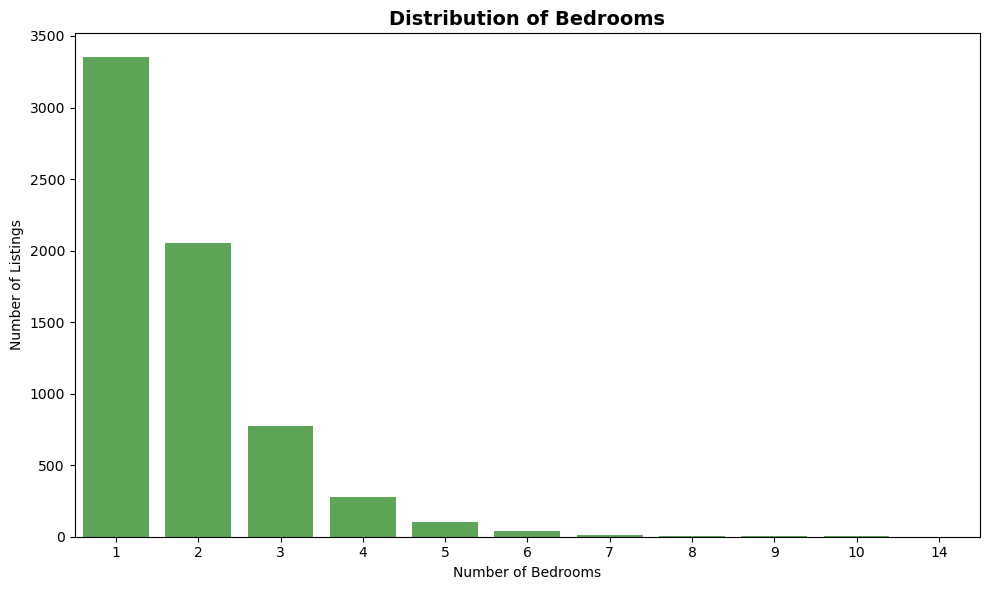

In [ ]:
# Bar chart for bedrooms
bedroom_counts = train['bedrooms'].dropna().astype(int).value_counts().sort_index().reset_index()
bedroom_counts.columns = ['Bedrooms', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Bedrooms', y='Count', data=bedroom_counts, color="#54B04C")

# Styling
plt.title("Distribution of Bedrooms", fontsize=14, fontweight='bold')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Listings")
plt.grid(False)
plt.tight_layout()
plt.show()


- **Observation**: The majority of listings have 1 bedroom (around 3,300 listings), followed by 2-bedroom properties (2,000 listings). Listings with 3 or more bedrooms decline sharply, with only a small number offering more than 5. Properties with more than 6 bedrooms are extremely rare. The suggests that the listings are primarily designed for solo travelers, couples, or small families, rather than large groups.

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video.

**Total Marks: 9**

Student in charge of this task: `Khuat Son Tra Nguyen (48144134)`

#### Structured Function-Based Data Preprocessing

Instead of writing multiple code lines to clean data, a more structured and systematic approach will be performed by creating functions for each step of data preprocessing. This approach is expected to provide more critical advantages for a comprehensive machine learning pipeline development.

**1. Prevents Data Leakage**.
All preprocessing parameters, especially for data imputation are computed exclusively from training data and applied consistently to test data. This ensures no future information leaks into model training.

**2. Modular and Maintainable**.
Each preprocessing step is encapsulated in a function with single responsibility. This makes debugging easier, enables targeted modifications, and improves code readability for team collaboration.

**3. Reproducible and Scalable**.
The structured pipeline can be systematically applied to new datasets, unit tested independently, and easily extended with additional preprocessing steps as needed.

**4. Quality Control**.
Function-based validation at each step enables early error detection and ensures consistent transformations across all data splits, leading to more reliable model performance.

To begin, we start by import necessary libraries and load the datasets to start data preparation process:

In [ ]:
import pandas as pd
import numpy as np
import json
import re

from math import sqrt, sin, cos, asin, radians
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Data Loading ---
def load_dataset(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

**Question 1 - Approach: Numerical Feature Cleaning**

• **Converting percentage columns**: Removing '%' symbols from `host_response_rate` and `host_acceptance_rate`, converting to decimal format (e.g., "85%" → 0.85).

• **Cleaning price data**: Removing ' and ',' symbols from `price` column to extract numerical values (e.g., "$1,250" → 1250.0).
However, I won't perform this here anymore because it was cleaned in Task 1 so that basic EDA can be performed.

• **Processing bathroom text**: Converting mixed text in `bathrooms` column by replacing "half" with "0.5" and extracting numerical values using regex.

• **Standardizing data types**: Converting all cleaned values to float type for consistent numerical format.

In [ ]:
## Task 2, Question 1
# --- Feature Cleaning ---
def clean_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean numerical features by extracting numerical values and removing text.
    Specifically handles 'host_response_rate', 'host_acceptance_rate', 'price',
    and 'bathrooms' columns to convert them from mixed text/numeric format to pure numeric values.
    """
    percent_cols = ['host_response_rate', 'host_acceptance_rate']
    for col in percent_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = df[col].str.replace('%', '').astype(float) / 100

    # if 'price' in df.columns and df['price'].dtype == 'object':
    #    df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

    if 'bathrooms' in df.columns and df['bathrooms'].dtype == 'object':
        df['bathrooms'] = df['bathrooms'].str.replace('half', '0.5', case=False)
        df['bathrooms'] = df['bathrooms'].str.extract(r'(\d+\.?\d*)').astype(float)
    return df

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

**Question 2 - Approach: Feature Engineering from Multi-Information Columns**

Given: Existing features containing multiple items of information are host_verifications, and amentities so new features will be created from these two.

- **Feature 1 - `verification_count`**: Counting the number of host verification methods from `host_verifications` column by splitting comma-separated values.

- **Feature 2 - `amenity_count`**: Converting `amenities` column into total count of available amenities by splitting the comma-separated list.

- **Features 3-9 - Luxury amenity indicators**: Creating seven binary features (0/1) for specific amenities:
  - `has_pool`: Pool or hot tub availability
  - `has_heating_cooling`: Air conditioning or heating systems
  - `has_coffee_maker`: Coffee-making equipment
  - `has_parking`: Any type of parking availability
  - `has_private_balcony`: Private outdoor space
  - `has_high_quality_bedding`: Premium bedding amenities
  - `has_scenic_view`: Properties with views  

- **Feature 10 - `luxury_amenity_count`**: Summing all luxury amenity indicators to create a composite luxury score.

In [ ]:
## Task 2, Question 2
# --- New Feature Creating ---
def create_new_features(df):
    """
    Create new features from existing multi-information columns (host_verifications and amenities).
    Extracts counts and key indicators to convert complex text data into usable numerical features.
    """
    # Feature 1: Count of host verification methods
    if 'host_verifications' in df.columns:
        df['verification_count'] = df['host_verifications'].apply(lambda x: len(x.split(',')) if x else 0)

    if 'amenities' in df.columns:
        # Feature 2: Total amenity count
        df['amenity_count'] = df['amenities'].str.split(', ').apply(len)

        # Feature 3-9: Has luxury amenities and scenic view
        luxury_keywords = {
            'has_pool': ['pool', 'hot tub'],
            'has_heating_cooling': ['air conditioning', 'ac', 'heating', 'central heating'],
            'has_coffee_maker': ['coffee maker', 'nespresso', 'espresso machine'],
            'has_parking': ['free parking', 'paid parking', 'garage', 'carport', 'street parking'],
            'has_private_balcony': ['private patio or balcony', 'balcony', 'terrace'],
            'has_high_quality_bedding': ['high quality linens', 'extra pillows and blankets',
                                         'room-darkening shades', 'blackout curtains',
                                         'comfortable bedding', 'premium linens'],
            'has_scenic_view': ['view']  # generic catch-all for anything containing 'view'
        }

        for col, keywords in luxury_keywords.items():
            pattern = r'|'.join(rf'\b{re.escape(kw)}\b' for kw in keywords)
            df[col] = df['amenities'].str.contains(pattern, case=False, regex=True).astype(int)

        # Feature 10: Count of luxury amenities
        df['luxury_amenity_count'] = df[list(luxury_keywords.keys())].sum(axis=1)

    return df

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

**Question 3 - Approach: Missing Value Imputation**

- **Text columns imputation**: Filling missing values in descriptive text columns (`name`, `description`, `neighborhood_overview`, `host_about`) with default text "no information" to maintain data completeness.

- **Categorical columns imputation**: Using mode (most frequent value) from training data to fill missing values in categorical columns like `host_response_time`, `host_is_superhost`, `property_type`, and `room_type`.

- **Numerical columns imputation**: Filling missing values in numerical columns (review scores, rates, counts) with mean values calculated from the training dataset to preserve statistical properties.

- **Date-related columns imputation**: For `days_since_first_review` and `days_since_last_review`, using maximum values to handle properties without review history by assuming they are new listings.

- **Training-based imputation**: Using statistics from training data (mode/mean) for both training and test datasets to prevent data leakage and maintain consistency across datasets.

In [ ]:
## Task 2, Question 3
# --- Missing Value Imputation ---
def impute_missing(df: pd.DataFrame, train_df: pd.DataFrame, fill_text='no information') -> pd.DataFrame:
    """
    Generalized missing value imputation based on inferred data types and characteristics.
    - Text columns: filled with constant text
    - Categorical columns: filled with mode from training
    - Numeric columns (generalized): filled with mean from training
    - Date-like columns: filled with max from test
    """
    # Explicit imputation for known text columns
    text_cols = ['name', 'description', 'neighborhood_overview', 'host_about']
    for col in [c for c in text_cols if c in df.columns]:
        df[col].fillna(fill_text, inplace=True)

    # Explicit imputation for known categorical columns
    cat_cols = ['host_response_time', 'host_is_superhost', 'host_location',
                'host_neighbourhood', 'property_type', 'room_type', 'neighbourhood_cleansed']
    for col in [c for c in cat_cols if c in df.columns]:
        df[col].fillna(train_df[col].mode()[0], inplace=True)

    # Generalized numeric + date-like handling
    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue # Skip columns with no missing values

        if pd.api.types.is_numeric_dtype(df[col]):
            # If column name suggests it's date-related but stored as numeric, use max value (e.g. "days_since_*")
            if 'days_since' in col or 'date' in col:
                df[col].fillna(df[col].max(), inplace=True)

            # Otherwise, use mean from training set; fallback to current df mean if missing
            else:
                df[col].fillna(train_df[col].mean(), inplace=True)

        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col].fillna(df[col].max(), inplace=True)


    return df

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class.

- Where multiple values are given for an observation encode the observation as 'other'.
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

**Question 4 - Approach: Categorical Variable Encoding**

##### 4.1 Amenities Encoding
- **JSON parsing**: Converting amenities from JSON-like strings into lists for processing.
- **Top-5 selection**: Identifying the 5 most frequent amenities from training data to create binary features.
- **Binary encoding**: Creating `has_[amenity_name]` features (0/1) for each top-5 amenity.
- **'Other' category**: Adding `has_other_amenities` binary feature for properties with amenities outside the top-5.

##### 4.2 Neighbourhood Encoding
- **Multi-criteria selection**: Choosing neighbourhoods based on three criteria:
  - Top 10 most frequent neighbourhoods
  - Top 10 highest-priced neighbourhoods  
  - Top 10 lowest-priced neighbourhoods
- **Binary encoding**: Creating `neigh_[neighbourhood_name]` binary features for selected neighbourhoods.
- **'Others' category**: Neighbourhoods not selected are implicitly grouped as "other" (all binary features = 0).

##### 4.3 Other Features Encoding
- **Ordinal encoding**: Converting `host_response_time` to numerical scale (within an hour=4, few hours=3, within a day=2, few days or more=1).
- **Boolean conversion**: Mapping 't'/'f' values to 1/0 for columns like `host_is_superhost`, `instant_bookable`.
- **One-hot encoding**: Creating dummy variables for `bath_type` and `room_type`.
- **Top-5 + 'Others' category**: For `property_type`, limiting to 5 most frequent categories from training data, grouping remaining as "Other", then one-hot encoding.

##### Key Principles Applied
- **Training-based statistics**: Using training data frequencies to determine top categories for consistent encoding.
- **Handling unpopular categories**: Grouping infrequent values into "Other" category as specified.

In [ ]:
## Task 2, Question 4
# --- 4.1 Amenities Encoding ---
def encode_amenities(df: pd.DataFrame, train_df: pd.DataFrame) -> pd.DataFrame:
    """
    Create binary features for the top 5 most common amenities from training data.
    Parses amenities from JSON-like strings, identifies the most frequent amenities,
    and creates indicator variables for popular amenities plus a catch-all for other amenities.
    """
    def parse(amenities):
        try:
            if isinstance(amenities, str):
                return json.loads(amenities.replace("'", '"'))
            return []
        except:
            return []

    if 'amenities' in df.columns:
        # Parse amenities for both dataframes
        df['amenities_list'] = df['amenities'].apply(parse)
        train_df['amenities_list'] = train_df['amenities'].apply(parse)

        # Get top 5 amenities from training data
        all_items = [item for sublist in train_df['amenities_list'] for item in sublist]
        top_5 = pd.Series(all_items).value_counts().nlargest(5).index.tolist()

        # Create binary features for top 5 amenities
        for amenity in top_5:
            key = f'has_{amenity.lower().replace(" ", "_")}'
            df[key] = df['amenities_list'].apply(lambda x: int(amenity in x))

        # Create feature for other amenities
        df['has_other_amenities'] = df['amenities_list'].apply(lambda x: int(any(i not in top_5 for i in x)))

    return df

# --- 4.2 Location Encoding ---
def encode_neighbourhoods(df: pd.DataFrame, train_df: pd.DataFrame) -> pd.DataFrame:
    if 'neighbourhood_cleansed' not in df.columns:
        return df
    top_freq = train_df['neighbourhood_cleansed'].value_counts().nlargest(10).index.tolist()
    top_price = train_df.groupby('neighbourhood_cleansed')['price'].mean().nlargest(10).index.tolist()
    low_price = train_df.groupby('neighbourhood_cleansed')['price'].mean().nsmallest(10).index.tolist()
    selected = list(set(top_freq + top_price + low_price))

    for neigh in selected:
        df[f"neigh_{neigh.replace(' ', '_').lower()}"] = (df['neighbourhood_cleansed'] == neigh).astype(int)
    return df

# --- 4.3 Other Features Encoding ---
def encode_other_features(df: pd.DataFrame, train_df: pd.DataFrame) -> pd.DataFrame:
    """
    Encode features respectively:
    - Ordinal encode host_response_time
    - Convert booleans ('t'/'f') to 1/0
    - One-hot encode room_type and bath_type
    - One-hot encode top-5 property_type (others grouped)
    """
    # Ordinal encode response time
    if 'host_response_time' in df.columns:
        response_order = {'within an hour': 4, 'within a few hours': 3, 'within a day': 2, 'a few days or more': 1}
        df['host_response_time'] = df['host_response_time'].map(response_order).fillna(0).astype(int)

    # One-hot encode bath_type and room_type
    for col in ['bath_type', 'room_type']:
        if col in df.columns:
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)

    # Property type: Top-5 + Other one-hot
    if 'property_type' in df.columns:
        top5 = train_df['property_type'].value_counts().nlargest(5).index
        df['property_type_limited'] = df['property_type'].where(df['property_type'].isin(top5), 'Other')
        df = pd.concat([df, pd.get_dummies(df['property_type_limited'], prefix='property_type')], axis=1)

    # Convert boolean columns
    bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
                # this doesn't include 'has_availabity' because this column contains only 1 value 't', which will not meaningful to the machine learning process
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].map({'t': 1, 'f': 0}).fillna(-1)

    # Final Safe-Net: turn all new introduced bool dtype columns to int
        bool_dtype_cols = df.select_dtypes(include='bool').columns
        df[bool_dtype_cols] = df[bool_dtype_cols].astype(int)


    return df

**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.
(1 mark)

**Question 5 - Approach: Additional Data Preparation Steps**

To enhance model performance and capture complex data patterns, the following additional preprocessing steps were applied:
1. *Additional Feature Engineering (Sections 5.1-5.3):*
    - Applied before imputation (Q3) to ensure any new missing values introduced can be immediately handled.
    
        ---
2. *Sentiment Analysis (Section 5.4)*
    - Performed after handling missing values (Q3), focusing on text features.
        
        ---
3. *Feature Transformation (Section 5.5)*
    - Applied to reduce feature bias and improve numerical stability
    
        ---
4. *Pipeline Integration and Execution (Sections 5.6–5.7)*
   - Ensures a logically structured and reproducible processing flow.  
   - Facilitates debugging, testing, and future enhancements to the preprocessing pipeline.

**5.1 Extra Feature Engineering**

**Goal:** Transform raw textual and date fields into structured, informative features.

- Bathroom and Room Type Extraction
  - `bath_type`: Categorizes bathrooms as 'Shared', 'Private', or 'Normal' based on keywords.
  - `room_type`: Standardizes room type entries using keyword matching (e.g., 'entire', 'shared').
      
      ---
        
- Date-Based Features
  - Converts `host_since`, `first_review`, and `last_review` to datetime.
  - Derived features:
    - `host_experience_days`: Days since host joined.
    - `days_since_first_review`: Days since the first review.
    - `days_since_last_review`: Days since the last review.
    
    ---
        
- Popularity Metrics
  - `reviews_per_day`: Measures listing popularity as number_of_reviews ÷ host_experience_days.
        
      ---
        
- Temporal Scaling
  - `review_recency_score`: Recency scaled with exponential decay to favor recent reviews.
  - `host_experience_maturity`: Log-transformed host experience for diminishing returns effect.

In [ ]:
# Task 2, Question 5
# --- 5.1 Creating Extra Features ---
def add_extra_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create additional engineered features from existing data including bathroom/room type extraction,
    date-based features for host experience and review timing, popularity metrics, and temporal scaling.
    Transforms raw data into more meaningful features for machine learning models.
    """
    # --- Bath & Room Type Extraction ---
    bath_mapping = {'hared': 'Shared', 'rivate': 'Private'}
    room_mapping = {'entire': 'Entire', 'shared': 'Shared', 'private': 'Private', 'hotel': 'Hotel'}

    if 'bathrooms' in df.columns:
        df['bath_type'] = df['bathrooms'].astype(str).apply(
            lambda x: next((v for k, v in bath_mapping.items() if k in x), 'Normal')
        )
        df['bathroom_count'] = df['bathrooms']

    if 'room_type' in df.columns:
        df['room_type'] = df['room_type'].astype(str).str.lower().apply(
            lambda x: next((v for k, v in room_mapping.items() if k in x), 'Unknown')
        )

    # --- Date Parsing ---
    date_cols = ['host_since', 'first_review', 'last_review']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # --- Experience & Review Age Features ---
    ref_date = max([df[col].max() for col in date_cols if col in df.columns])
    feature_ages = {
        'host_since': 'host_experience_days',
        'first_review': 'days_since_first_review',
        'last_review': 'days_since_last_review'
    }
    for col, new_col in feature_ages.items():
        if col in df.columns:
            df[new_col] = (ref_date - df[col]).dt.days

    df.drop([col for col in date_cols if col in df.columns], axis=1, inplace=True)

    # --- Popularity Signal ---
    if {'number_of_reviews', 'host_experience_days'}.issubset(df.columns):
        df['reviews_per_day'] = df['number_of_reviews'] / df['host_experience_days'].replace(0, np.nan)

    # --- Temporal Scaling ---
    if 'days_since_last_review' in df.columns:
        df['review_recency_score'] = np.exp(-df['days_since_last_review'] / 365)

    if 'host_experience_days' in df.columns:
        df['host_experience_maturity'] = np.log1p(df['host_experience_days'])

    return df

**5.2 Distance-Based Features**

**Goal:** Quantify geographic desirability based on proximity to Melbourne landmarks.

- Distance Calculations (Haversine Formula)
  - `dist_to_cbd`: Distance to Melbourne CBD.
  - `dist_to_beach`: Distance to the nearest beach.
  - `dist_to_mall`: Distance to the nearest shopping mall.
  
  ---

- Proximity Count
  - `count_nearby_sights`: Number of attractions (CBD, malls, beaches) within a 0.8 km radius (equivalent to 10-minute walking distance, a favourable distance for AirBnb tenants).

In [ ]:
# --- 5.2 Creating Distance Features ---
def add_distance_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate location-based features using haversine distance formula.
    Computes distances to Melbourne CBD, nearest beach, nearest shopping mall,
    and counts nearby attractions within 0.8km radius to capture location desirability.
    """
    def haversine(lon1, lat1, lon2, lat2):
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        dlon, dlat = lon2 - lon1, lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        return 6371 * 2 * asin(sqrt(a))

    # Central Business District (CBD) coordinates
    cbd = (-37.8136, 144.9631)

    # List of major Melbourne beaches
    beaches = [
        (-37.847039, 144.945525),  # Port Melbourne
        (-37.854066, 144.960893),  # South Melbourne / Middle Park
        (-37.864000, 144.982000),  # St Kilda
        (-37.892639, 144.988190),  # Elwood
        (-37.905000, 144.996000),  # Brighton (Dendy St)
        (-37.937000, 145.009000),  # Hampton
        (-37.952500, 145.012311),  # Sandringham
        (-37.989640, 145.058720),  # Mentone
        (-38.000000, 145.083330),  # Mordialloc
        (-38.042559, 145.109469),  # Edithvale
        (-38.053029, 145.113617),  # Chelsea
        (-38.083330, 145.133330),  # Carrum
        (-38.100000, 145.133330),  # Seaford
        (-38.140343, 145.119280),  # Frankston
        (-37.870911, 144.830323),  # Altona
        (-37.863930, 144.894320)   # Williamstown
    ]

    # List of popular Melbourne shopping malls
    malls = [
        (-37.887085, 145.081528),  # Chadstone Shopping Centre
        (-37.770700, 144.884800),  # Highpoint Shopping Centre
        (-37.958000, 145.050000),  # Westfield Southland
        (-37.783333, 145.121667),  # Westfield Doncaster
        (-37.868970, 145.241480),  # Westfield Knox
        (-38.017833, 145.302500),  # Westfield Fountain Gate
        (-37.813060, 145.229170),  # Eastland Shopping Centre
        (-37.738330, 145.029720),  # Northland Shopping Centre
        (-37.876390, 145.165638),  # The Glen (Glen Waverley)
        (-37.812400, 144.963800),  # Emporium Melbourne
        (-37.810272, 144.962646),  # Melbourne Central
        (-37.810696, 144.965716),  # QV Melbourne
        (-37.813002, 144.938031),  # The District Docklands
        (-37.875213, 144.679659),  # Pacific Werribee
        (-37.652004, 145.023085),  # Pacific Epping
        (-37.819560, 145.121410),  # Box Hill Central (South)
        (-37.812724, 145.010977),  # Victoria Gardens (Richmond)
        (-37.825196, 144.949879),  # DFO South Wharf
        (-37.733125, 144.906547),  # DFO Essendon
        (-37.971261, 145.088120),  # DFO Moorabbin
        (-37.651367, 145.071752),  # Westfield Plenty Valley
        (-37.699266, 144.775813),  # Watergardens Town Centre
        (-37.992893, 145.173138),  # Parkmore Shopping Centre
        (-38.141951, 145.124068)   # Bayside Shopping Centre
    ]

    df['dist_to_cbd'] = df.apply(lambda r: haversine(r['longitude'], r['latitude'], cbd[1], cbd[0]), axis=1)
    df['dist_to_beach'] = df.apply(lambda r: min(haversine(r['longitude'], r['latitude'], lon, lat) for lat, lon in beaches), axis=1)
    df['dist_to_mall'] = df.apply(lambda r: min(haversine(r['longitude'], r['latitude'], lon, lat) for lat, lon in malls), axis=1)

    top_sights = [cbd] + beaches + malls
    def count_nearby_sights(row):
        return sum(
            1 for lat, lon in top_sights
            if haversine(row['longitude'], row['latitude'], lon, lat) <= 0.8
        )

    df['count_nearby_sights'] = df.apply(count_nearby_sights, axis=1)

    return df

**5.3 Interaction Features**

**Goal:** Capture important combinations of features that express non-linear relationships.

- Superhost Experience
  - `superhost_experience`: Interaction of superhost flag and host experience.
  
    ---
- Space Efficiency
  - `crowding_index`: Accommodates ÷ (bedrooms + bathrooms) for space utilization.
  
    ---
- Luxury and More Capacity Impact
  - `luxury_entire_home`: Product of luxury amenity count and entire-home flag.
  
    ---
- Location-View with Good Rating
  - `cbd_view_interaction`: Combines `dist_to_cbd` with view indicator or value rating.
  
    ---
- Rating-Volume Interaction
  - `rating_review_volume`: Review score multiplied by reviews per day.

In [ ]:
# --- 5.3 Creating Interaction Features ---
def add_interaction_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create interaction features by combining existing features to capture non-linear relationships.
    These features represent meaningful combinations like experienced superhosts, space efficiency,
    luxury entire homes, location-view interactions, and rating-popularity synergies.
    """
    if 'is_superhost' in df.columns and 'host_experience_days' in df.columns:
        df['superhost_experience'] = df['is_superhost'] * df['host_experience_days']

    if 'accommodates' in df.columns and 'bedrooms' in df.columns and 'bathroom_count' in df.columns:
        df['crowding_index'] = df['accommodates'] / (df['bedrooms'] + df['bathroom_count']).replace(0, np.nan)

    if 'amenity_count' in df.columns and 'room_type_Entire' in df.columns:
        df['luxury_entire_home'] = df['luxury_amenity_count'] * df['room_type_Entire']

    if 'dist_to_cbd' in df.columns and 'has_scenic_view' in df.columns:
        df['cbd_view_interaction'] = df['dist_to_cbd'] * df['has_scenic_view']

    if 'dist_to_cbd' in df.columns and 'review_scores_value' in df.columns:
        df['cbd_view_interaction'] = df['dist_to_cbd'] * df['review_scores_value']

    if 'review_scores_rating' in df.columns and 'reviews_per_day' in df.columns:
        df['rating_review_volume'] = df['review_scores_rating'] * df['reviews_per_day']

    return df

**5.4 Sentiment Analysis**

**Goal:** Extract emotional tone from descriptive text fields.

- **VADER Sentiment Scores**
  - Applied to `neighborhood_overview` and `host_about`.
  - Outputs:
    - `neighborhood_overview_sentiment`
    - `host_about_sentiment`
  - Compound scores (range -1 to 1) indicate overall sentiment polarity.

In [ ]:
# --- 5.4 Creating Sentiment Features ---
def add_sentiment_scores(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean text and apply VADER sentiment analysis to specific columns:
    'neighborhood_overview', and 'host_about'.

    Cleaning includes:
    - Removing HTML tags
    - Removing non-alphanumeric characters (except basic punctuation)
    - Trimming extra whitespace

    Add sentiment analysis scores to text columns using VADER sentiment analyzer.
    Analyzes neighborhood_overview and host_about text to extract sentiment polarity scores,
    which can indicate positive or negative sentiment that may influence booking decisions.
    """
    sid = SentimentIntensityAnalyzer()

    def clean_text(text):
        if not isinstance(text, str):
            return ""
        text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
        text = re.sub(r'[^\w\s.,!?\'-]', '', text)  # Remove unwanted non-alphanumerics
        text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
        return text

    columns = ['neighborhood_overview', 'host_about']
    for col in columns:
        if col in df.columns:
            df[col] = df[col].apply(clean_text)
            df[f'{col}_sentiment'] = df[col].apply(
                lambda x: sid.polarity_scores(x)['compound'] if x else 0.0
            )

    return df

**5.5 Mathematical Feature Transformations**

**Goal:** Normalize skewed distributions and better capture non-linear relationships.

- **Log1p Transform (Skew Reduction)**
  - Applied to variables like `minimum_nights`, `availability_365`, and date differences.
  
    ---

- **Square Root Transform (Diminishing Returns)**
  - Used on count features such as `accommodates`, `bedrooms`, `amenity_count`.
  
    ---

- **Square Transform (Quadratic Relationships)**
  - Applied to distance-based features (`dist_to_cbd`, etc.) to capture non-linear distance effects.

In [ ]:
# --- 5.5 Feature Transfromations ---
def apply_feature_transformations(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply mathematical transformations to features to improve model performance.
    Uses log1p for skewed variables, sqrt for diminishing returns features,
    and squares for distance features to better capture non-linear relationships.
    """
    # Reduce skew: apply log1p
    log1p_cols = [
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_maximum_nights',
        'availability_365', 'host_experience_days', 'days_since_first_review', 'days_since_last_review',
        'reviews_per_month', 'dist_to_beach', 'dist_to_mall', 'host_experience_days'
    ]
    for col in log1p_cols:
        if col in df.columns:
            df[f'{col}_log1p'] = np.log1p(df[col].clip(lower=0))

    # Diminishing returns: sqrt
    diminishing_cols = ['accommodates', 'bedrooms', 'bathroom_count', 'amenity_count', 'count_nearby_sights']
    for col in diminishing_cols:
        if col in df.columns:
            df[f'{col}_sqrt'] = np.sqrt(df[col].clip(lower=0))

    # Location non-linearity: square
    distance_cols = ['dist_to_cbd', 'dist_to_beach', 'dist_to_mall']
    for col in distance_cols:
        if col in df.columns:
            df[f'{col}_sq'] = df[col] ** 2

    return df

**5.6-5.7 Pipeline Integration**

**Goal:** Maintain consistency, avoid leakage, and ensure reproducibility.

- Steps are **sequentially applied** in the correct logical order:
  1. Feature extraction (bath/date-based)
  2. Distance and interaction features
  3. Missing value imputation
  4. Categorical encoding
  5. Sentiment scoring
  6. Final transformations
  
  ---

- Ensures **identical preprocessing** for both training and test sets using training-derived stats.
- Verifies column alignment and handles column drops/exports systematically.

In [ ]:
# --- 5.6 Cleanup & Export ---
def finalize_and_export(df: pd.DataFrame, output_path: str):
    """
    Removes unnecessary columns from the DataFrame and exports the cleaned dataset to CSV.
    """
    drop_cols = [
        'source', 'name', 'host_name', 'description', 'neighborhood_overview', 'property_type_limited',
        'host_about', 'host_location',  'host_neighbourhood', 'neighbourhood', 'host_verifications', 'bathrooms',
        'amenities', 'amenities_list', 'property_type', 'bath_type', 'room_type', 'has_availability', 'neighbourhood_cleansed'
    ]
    df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
    df.to_csv(output_path, index=False)
    return df

# --- 5.7 Run Pipeline ---
def preprocess(df: pd.DataFrame, ref_df: pd.DataFrame) -> pd.DataFrame:
    """
    Applies all preprocessing steps to transform raw data into model-ready features.
    """
    df = clean_features(df) # Q1
    df = create_new_features(df) # Q2

    df = add_extra_features(df) # Q5.1 --- add extra features ---
    df = add_distance_features(df) # Q5.2 --- add distance features ---
    df = add_interaction_features(df) # Q5.3 --- add interaction features ---

    df = impute_missing(df, ref_df) # Q3

    df = encode_amenities(df, ref_df) # Q4
    df = encode_neighbourhoods(df, ref_df) # Q4
    df = encode_other_features(df, ref_df) # Q4

    #df = add_sentiment_scores(df) # Q5.4 --- sentiment analysis ---
    df = apply_feature_transformations(df) # Q5.5 --- feature transformation ---

    return df

def run_pipeline():
    """
    Loads datasets, applies preprocessing pipeline, and exports cleaned data.
    """
    train_df = load_dataset('train.csv')
    test_df = load_dataset('test.csv')

    train_df = preprocess(train_df, train_df)
    test_df = preprocess(test_df, train_df)

    finalize_and_export(train_df, 'train_cleaned.csv')
    finalize_and_export(test_df, 'test_cleaned.csv')

run_pipeline() # Complete preprocessing data for Task 2

C:\Users\Trung\AppData\Local\Temp\ipykernel_28028\384266453.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_text, inplace=True)
C:\Users\Trung\AppData\Local\Temp\ipykernel_28028\384266453.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

---
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  


1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `Do Minh Huu Nguyen - 47772360`

#####*Load the data*

In [ ]:
import pandas as pd
df_train = pd.read_csv('train_cleaned.csv')
df_test = pd.read_csv('test_cleaned.csv')

##### *Load the required packages*

In [ ]:
!pip install lightgbm scikit-learn
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.5 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

import lightgbm as lgb
from lightgbm import LGBMRegressor

import optuna
import joblib
import warnings
warnings.filterwarnings('ignore')

### **1. EDA between the features and target variables**

In [ ]:
target_col = "price"
X = df_train.copy()
y = X.pop(target_col)

# Non-numeric Encode
def _ensure_numeric(s: pd.Series):
    return s if pd.api.types.is_numeric_dtype(s) else pd.factorize(s)[0]

X_num = X.apply(_ensure_numeric)

# Correlation Metrics
pearson = X_num.corrwith(y, method="pearson")
spearman = X_num.corrwith(y, method="spearman")

corr_df = pd.DataFrame({
    "pearson_r": pearson,
    "spearman_r": spearman
}).sort_values("spearman_r", ascending=False)

# Display top 15 and bottom 15
top_15 = corr_df.head(15)
bottom_15 = corr_df.tail(15)

# Combine for display
pd.set_option("display.max_rows", None)
display(pd.concat([top_15, bottom_15]))


,pearson_r,spearman_r
accommodates,0.035625,0.633733
accommodates_sqrt,0.035236,0.633733
bedrooms_sqrt,0.044315,0.586458
bedrooms,0.044372,0.586458
beds,0.031491,0.557194
room_type_Entire,0.021129,0.489278
bathroom_count_sqrt,0.029948,0.393047
bathroom_count,0.033182,0.393047
crowding_index,0.010617,0.369775
calculated_host_listings_count_entire_homes,0.003173,0.357920


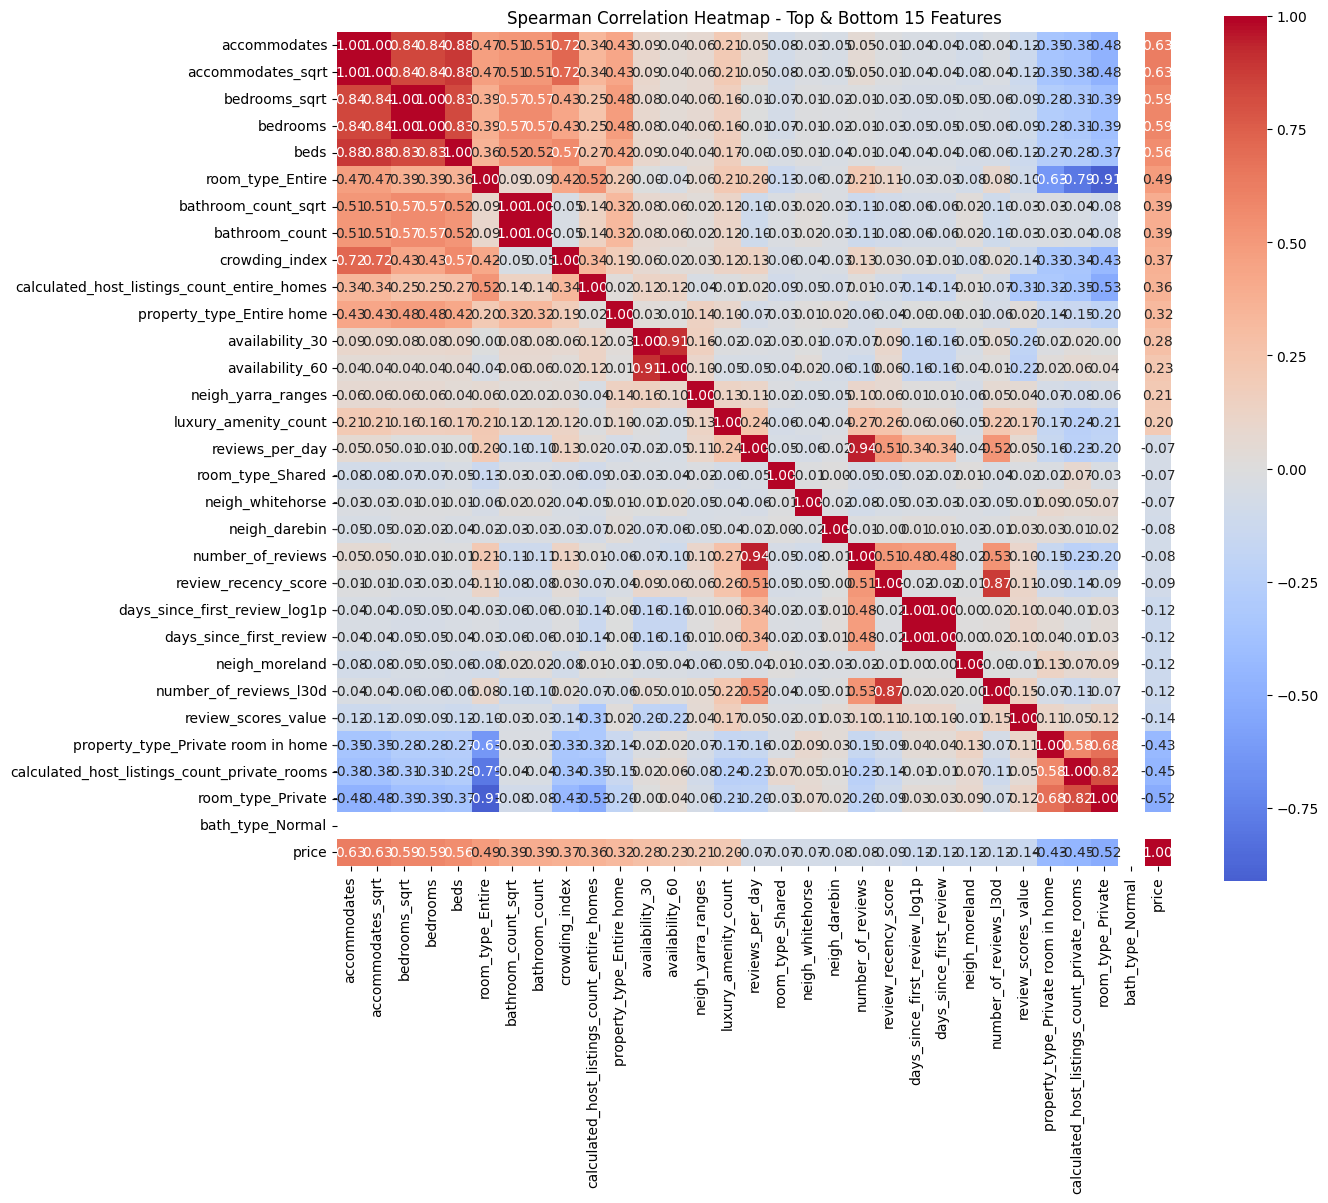

In [ ]:
# Combine top and bottom 15 features
top_bottom_features = pd.concat([top_15, bottom_15])
selected_features = top_bottom_features.index.tolist()

# Subset the dataframe with selected features + target
heatmap_df = df_train[selected_features + ["price"]].copy()

# Encode non-numeric features
heatmap_df = heatmap_df.apply(lambda s: s if pd.api.types.is_numeric_dtype(s) else pd.factorize(s)[0])

# Compute correlation matrix
corr_matrix = heatmap_df.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Spearman Correlation Heatmap - Top & Bottom 15 Features")
plt.tight_layout()
plt.show()


For the correlation analysis, we focused only **on the top 15 and bottom 15 features** based on their Spearman correlation with the target variable. This was done to highlight the most impactful features, both positively and negatively associated with price, while avoiding unnecessary complexity from weakly correlated variables.

**Here are some key takeaways:**

**1. Guest-capacity features boost price because they heighten perceived utility**
- accommodates, bedrooms and beds show the strongest positive links with price (ρ roughly 0.55 – 0.63).
- Why? Travellers mentally estimate cost per person. More sleeping spaces and separate bedrooms lower that perceived per-capita expense, letting hosts charge more overall while still appearing good value to larger groups.

**2. Extra bathrooms add comfort-driven premiums**
- bathroom_count (ρ ≈ 0.39) lifts price almost as effectively as a new bed.
- Why? In multi-guest stays, queuing for a single bathroom is a pain-point. An additional bath signals convenience and privacy, which guests willingly pay for, especially at higher occupancy levels.

**3. Entire-home status elevates the listing to a premium tier**
- The dummy room_type_Entire holds a sizable positive correlation (~0.49).
- Why? Entire homes offer autonomy, noise control and space for socialising—advantages unattainable in shared accommodation—so guests accept higher nightly rates.

**4. Private-room and shared-room indicators suppress price**
- room_type_Private and related flags correlate strongly negatively (~ –0.45 to –0.52).
- Why? These listings target budget travellers—often solo guests or students—who prioritise affordability over privacy, compelling hosts to keep rates low to maintain demand.

**5. Professional host scale nudges prices upward**
- A higher count of entire-home listings within a host’s portfolio correlates positively (~0.36).
- Why? Scale often accompanies professional management, faster issue resolution, and brand-like consistency, all of which justify modest rate premiums.

**6. Amenity depth fine-tunes premium but with diminishing returns**
- Features like luxury_amenity_count or total_amenities sit in the 0.20 – 0.25 range.
- Why? Extras such as high-speed Wi-Fi, dedicated work areas, or outdoor spas add perceived luxury. Yet once core needs—beds, baths, kitchen—are met, each additional amenity yields progressively smaller price lifts.

**7. Neighbourhood influences price only after core property traits**
- Affluent suburb dummies (e.g., Boroondara) show modest positives; budget areas (e.g., Moreland) show comparable negatives.
- Why? Location signals safety, prestige and proximity to attractions, but once guests secure the right-sized property, price differences between suburbs shrink relative to the effect of capacity and listing type.

**8. Higher near-term availability tends to align with higher nightly rates**
- availability_30 to availability_90 correlate around 0.20 – 0.28.
- Why? Premium listings can afford longer lead times between bookings because hosts value margin over occupancy; they list at elevated prices and accept vacancy until the right guest books.

**9. Frequent recent bookings correlate negatively with price**
- number_of_reviews_l30d and review_recency_score hover near –0.10.
- Why? Budget-oriented properties rely on high turnover. Cheaper nightly rates stimulate frequent stays and, in turn, a steady stream of fresh reviews.

**10. Older listings show mild price erosion**
- days_since_first_review (ρ ≈ –0.12) indicates that properties on the platform for years charge slightly less.
- Why? Photos, decorations and amenities age; new competitors enter with fresher designs, pressuring long-standing hosts to discount to stay competitive.

**11. High “value for money” review scores inversely relate to price**
- review_scores_value records a small negative correlation (~ –0.14).
- Why? Guests award top value scores when they feel they got a bargain, so high marks often coincide with lower nightly costs rather than higher quality.

**Overall**
Nightly price is anchored first by how many guests can sleep comfortably and whether the traveller receives the entire property, then refined by bath count, amenity richness and subtle neighbourhood cues. Operational factors—how often the property is booked or how much calendar inventory remains—reflect the host’s pricing strategy and inject a time-sensitive layer: high-occupancy, low-price listings cycle guests quickly, while premium listings tolerate vacancy in exchange for higher margins.

### **2. Model Selections**

For this competition, I have chosen four different regression models: LightGBM, Ridge, Lasso, and Support Vector Regression (SVR). Each model offers a different perspective on how the data can be learned and predicted.

- **LightGBM** is a gradient boosting framework that works well with large and high-dimensional datasets. It handles tabular data and categorical features efficiently and is great at capturing complex, non-linear patterns in the data. It’s also very fast and supports regularization to prevent overfitting.

- **Ridge Regression** is a linear model that adds L2 regularization. This helps deal with multicollinearity, especially when many numerical features are correlated. Ridge keeps all features but shrinks their impact.

- **Lasso Regression** is also a linear model but uses L1 regularization. Unlike Ridge, Lasso can reduce some coefficients to exactly zero, which makes it useful for feature selection. This is helpful when the dataset includes many dummy variables or when some features may not contribute much to the prediction.

- **Support Vector Regression (SVR)** takes a different approach by using a margin-based loss function and can model non-linear relationships with kernels like RBF. It is robust to outliers and offers a strong alternative to tree-based models.

Using these four models allows for a well-rounded comparison of linear, non-linear, regularized, and tree-based approaches. This helps build a deeper understanding of the data and ensures that the final model choice is backed by evidence from multiple perspectives.

### **3. Model Training and Hyperparameters Tunning**

#### **3.1 Data Standardisation**

In [ ]:
# 1. Define categorical columns based on binary and one-hot encoded features
categorical_cols = [
    'bath_type_Normal', 'has_coffee_maker', 'has_essentials', 'has_hangers',
    'has_heating_cooling', 'has_high_quality_bedding', 'has_iron', 'has_kitchen',
    'has_other_amenities', 'has_parking', 'has_pool', 'has_private_balcony',
    'has_scenic_view', 'has_smoke_alarm', 'host_has_profile_pic',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable',
    'neigh_banyule', 'neigh_bayside', 'neigh_boroondara', 'neigh_brimbank',
    'neigh_cardinia', 'neigh_casey', 'neigh_darebin', 'neigh_greater_dandenong',
    'neigh_kingston', 'neigh_knox', 'neigh_maribyrnong', 'neigh_maroondah',
    'neigh_melbourne', 'neigh_monash', 'neigh_moreland', 'neigh_nillumbik',
    'neigh_port_phillip', 'neigh_stonnington', 'neigh_whitehorse',
    'neigh_whittlesea', 'neigh_wyndham', 'neigh_yarra', 'neigh_yarra_ranges',
    'property_type_Entire guesthouse', 'property_type_Entire home',
    'property_type_Entire rental unit', 'property_type_Entire serviced apartment',
    'property_type_Other', 'property_type_Private room in home',
    'room_type_Entire', 'room_type_Hotel', 'room_type_Private',
    'room_type_Shared', 'room_type_Unknown'
]


In [ ]:
# 2. Define numerical columns as all others excluding 'ID' and 'price'
numerical_cols = [
    'accommodates', 'accommodates_sqrt', 'amenity_count', 'amenity_count_sqrt',
    'availability_30', 'availability_365', 'availability_365_log1p',
    'availability_60', 'availability_90', 'bathroom_count', 'bathroom_count_sqrt',
    'bedrooms', 'bedrooms_sqrt', 'beds', 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'cbd_view_interaction',
    'count_nearby_sights', 'count_nearby_sights_sqrt', 'crowding_index',
    'days_since_first_review', 'days_since_first_review_log1p',
    'days_since_last_review', 'days_since_last_review_log1p', 'dist_to_beach',
    'dist_to_beach_log1p', 'dist_to_beach_sq', 'dist_to_cbd', 'dist_to_cbd_sq',
    'dist_to_mall', 'dist_to_mall_log1p', 'dist_to_mall_sq',
    'host_acceptance_rate', 'host_experience_days', 'host_experience_days_log1p',
    'host_experience_maturity', 'host_listings_count', 'host_response_rate',
    'host_response_time', 'latitude', 'longitude', 'luxury_amenity_count',
    'maximum_maximum_nights', 'maximum_maximum_nights_log1p',
    'maximum_minimum_nights', 'maximum_nights', 'maximum_nights_avg_ntm',
    'maximum_nights_log1p', 'minimum_maximum_nights', 'minimum_minimum_nights',
    'minimum_minimum_nights_log1p', 'minimum_nights', 'minimum_nights_avg_ntm',
    'minimum_nights_log1p', 'number_of_reviews', 'number_of_reviews_l30d',
    'number_of_reviews_ltm', 'rating_review_volume', 'review_recency_score',
    'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location',
    'review_scores_rating', 'review_scores_value', 'reviews_per_day',
    'reviews_per_month', 'reviews_per_month_log1p', 'verification_count'
]

In [ ]:
# 3. Separate features and target
X_train = df_train.drop(columns=['price','ID'])
y_train = df_train['price']
X_test = df_test.drop(columns=['ID'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Define pipeline only for numeric features
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Only apply transformation to numerical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols)
], remainder='passthrough')  # keep other columns (already encoded categoricals) unchanged

# Fit and transform training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform test data (do not fit)
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
# Convert the scaled NumPy arrays back to DataFrames to retain column names and indices
# This helps with debugging, visualization, and maintaining structure for downstream tasks
X_train_scaled = pd.DataFrame(X_train, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X_test.columns)

#### **3.2 Hyperparameters Tunning**

We used **Optuna** for hyperparameter tuning instead of **GridSearchCV** or **RandomizedSearchCV** because it offers a more efficient and scalable optimization process, especially when dealing with a large or complex hyperparameter space.

**Optuna** uses a Bayesian optimization strategy that intelligently explores promising regions based on previous trials, rather than exhaustively (GridSearch) or randomly (RandomizedSearch) testing combinations. This allows it to find better hyperparameter configurations in fewer iterations, saving computation time. Importantly, Optuna supports cross-validation during its search process, which aligns with the task’s requirement to tune models via cross-validation while also enabling retrieval of the fitted weights, optimized hyperparameters, and training performance metrics for comparison and discussion.

In [ ]:
# Log-transform target
y_train_log = np.log1p(y_train)

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 1. Lasso tuning
def lasso_objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 10.0)
    model = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_log, scoring='neg_mean_absolute_error', cv=cv)
    return -1.0 * np.mean(scores)

lasso_study = optuna.create_study(direction='minimize')
lasso_study.optimize(lasso_objective, n_trials=30)

best_alpha = lasso_study.best_params['alpha']
lasso_model = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
lasso_model.fit(X_train_scaled, y_train_log)

## Evaluate on training set
y_pred_log = lasso_model.predict(X_train_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

print("Lasso Results:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))


**Output**
- Parameter: 'alpha': 9.366763955229503

In [ ]:
# 2. Ridge tuning
def ridge_objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 10.0)
    model = Ridge(alpha=alpha, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train_log, scoring='neg_mean_absolute_error', cv=cv)
    return -1.0 * np.mean(scores)

ridge_study = optuna.create_study(direction='minimize')
ridge_study.optimize(ridge_objective, n_trials=30)

best_alpha = ridge_study.best_params['alpha']
ridge_model = Ridge(alpha=best_alpha, random_state=42)
ridge_model.fit(X_train_scaled, y_train_log)

y_pred_log = ridge_model.predict(X_train_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

print("Ridge Results:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))


**Output**
- Parameter: 'alpha': 0.00010814973161790666

In [ ]:
# 3. SVR tuning
def svr_objective(trial):
    C = trial.suggest_loguniform('C', 1e-2, 100)
    epsilon = trial.suggest_loguniform('epsilon', 1e-3, 1.0)

    model = SVR(C=C, epsilon=epsilon, kernel='rbf')  # Only RBF kernel
    scores = cross_val_score(model, X_train_scaled, y_train_log, scoring='neg_mean_absolute_error', cv=cv)
    return -1.0 * np.mean(scores)

svr_study = optuna.create_study(direction='minimize')
svr_study.optimize(svr_objective, n_trials=30)

best_C = svr_study.best_params['C']
best_epsilon = svr_study.best_params['epsilon']

svr_model = SVR(C=best_C, epsilon=best_epsilon, kernel='rbf')
svr_model.fit(X_train_scaled, y_train_log)

## Evaluate on training set
y_pred_log = svr_model.predict(X_train_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

print("SVR (RBF) Results:")
print("Best C:", best_C)
print("Best Epsilon:", best_epsilon)
print("MAE:", mean_absolute_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))

**Output**
- Parameters: {'C': 0.25950163563727996, 'epsilon': 0.1462014790273926, 'gamma': 'scale'}

In [ ]:
# 4. LightGBM tuning
def lgbm_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    model = LGBMRegressor(**params)
    scores = cross_val_score(model, X_train_scaled, y_train_log, scoring='neg_mean_absolute_error', cv=cv)
    return -1.0 * np.mean(scores)

lgbm_study = optuna.create_study(direction='minimize')
lgbm_study.optimize(lgbm_objective, n_trials=30)

best_params = lgbm_study.best_params
lgbm_model = LGBMRegressor(**best_params)
lgbm_model.fit(X_train_scaled, y_train_log)

y_pred_log = lgbm_model.predict(X_train_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_train_log)

print("LightGBM Results:")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("R2:", r2_score(y_true, y_pred))

**Output**
- Parameters: {'learning_rate': 0.027767801958086955, 'max_depth': 9, 'n_estimators': 673}

#### **3.3 Fitted Weights, Hyperparameters, Training Dataset Predictive Performance**

In [ ]:
# Predict on training data
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_train_pred_lgbm = lgbm_model.predict(X_train_scaled)

# Un-log the predictions if y_train was log-transformed
y_train_actual = np.expm1(y_train_log)  # Replace with your actual log-transformed variable
y_preds = {
    "Lasso": np.expm1(y_train_pred_lasso),
    "Ridge": np.expm1(y_train_pred_ridge),
    "SVR": np.expm1(y_train_pred_svr),
    "LightGBM": np.expm1(y_train_pred_lgbm)
}

In [ ]:
# Print metrics
for name, pred in y_preds.items():
    print(f"\n{name} Model:")
    print("MAE:", mean_absolute_error(y_train_actual, pred))
    print("R²:", r2_score(y_train_actual, pred))

# Fitted weights and hyperparameters
print("\nLasso Coefficients (non-zero):")
print(pd.Series(lasso_model.coef_, index=X_train.columns)[lasso_model.coef_ != 0])

print("\nRidge Coefficients (top 20 by absolute value):")
print(pd.Series(ridge_model.coef_, index=X_train.columns).abs().sort_values(ascending=False).head(20))

print("\nBest Hyperparameters:")

def get_best_params(model, name):
    if hasattr(model, 'best_params_'):
        print(f"{name} best_params_:", model.best_params_)
    else:
        print(f"{name} tuned params:", {
            k: v for k, v in model.get_params().items()
            if k in ['alpha', 'C', 'epsilon', 'gamma', 'n_estimators', 'max_depth', 'learning_rate']
        })

get_best_params(lasso_model, "Lasso")
get_best_params(ridge_model, "Ridge")
get_best_params(svr_model, "SVR")
get_best_params(lgbm_model, "LightGBM")

print("\nLightGBM Feature Importance (Top 20):")
importances = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))


Lasso Model:
MAE: 169.51489786655335
R²: -0.0018183608353377068

Ridge Model:
MAE: 125.09144147058021
R²: 0.0024688092897784397

SVR Model:
MAE: 172.4811538727366
R²: -0.002355255026167846

LightGBM Model:
MAE: 82.58814553108292
R²: 0.04652351587177206

Lasso Coefficients (non-zero):
maximum_nights             2.881775e-05
minimum_maximum_nights     1.534345e-10
maximum_maximum_nights    -1.972286e-10
maximum_nights_avg_ntm     4.082850e-10
availability_365           2.845247e-04
host_experience_days       1.542553e-05
days_since_first_review   -7.252600e-05
dist_to_beach_sq           1.204600e-04
dtype: float64

Ridge Coefficients (top 20 by absolute value):
reviews_per_day              20.359586
rating_review_volume          4.451685
accommodates_sqrt             1.160995
bathroom_count_sqrt           0.522686
reviews_per_month_log1p       0.340313
crowding_index                0.325445
room_type_Hotel               0.316247
neigh_yarra_ranges            0.303549
room_type_Shared   

All four models were trained using cross-validation and optimized through Optuna, with the goal of minimizing prediction error on the training set. Among them, the **LightGBM model clearly outperformed** the others, achieving the lowest mean absolute error (MAE) of approximately 82.59 and the highest R² value of 0.0465. While this R² is still relatively low, it indicates that LightGBM captured some non-linear patterns in the data that linear models could not. Its top features included availability_365, days_since_last_review, longitude, and host_experience_days, which suggest that both temporal availability and location-related factors are strong signals for predicting price.

The **Ridge model** achieved a modest MAE of 125.09 but with a near-zero R² (0.0025), implying that while it produced stable predictions, it explained very little of the variance in the target variable. This aligns with its fitted coefficients, which were spread across many features, such as reviews_per_day, rating_review_volume, and accommodates_sqrt. These variables are intuitive and interpretable, but the low R² suggests that a linear model may not be sufficient for capturing complex relationships.

The **Lasso model** performed worse than Ridge, with an MAE of 169.51 and a slightly negative R², indicating poor generalization on the training set. However, one of the key advantages of Lasso is its ability to perform feature selection. The model assigned non-zero weights to only a small number of predictors such as availability_365, dist_to_beach_sq, and days_since_first_review, helping to identify potentially influential features even though its predictive accuracy was weak. This sparsity can be valuable for interpretation and downstream model simplification, though in this case it came at the cost of predictive performance.

The **SVR model** had the poorest results overall, with the highest MAE (172.48) and the most negative R² value. Despite Optuna tuning the hyperparameters (C, epsilon, and gamma), SVR struggled significantly. This could be due to the model's sensitivity to feature scaling, its limited capacity in high-dimensional feature spaces, or perhaps a suboptimal kernel choice. Its performance suggests that SVR may not be suitable for this particular dataset, especially compared to more flexible models like LightGBM.



### **4. Model Submission**

In [ ]:
# Predict on test data (already scaled)
y_test_pred_log = lgbm_model.predict(X_test_scaled)

# Unlog the predictions (if log1p was used)
y_test_pred = np.expm1(y_test_pred_log)

# Create the submission file using the 'ID' column from the original test set
submission_df = pd.DataFrame({
    "ID": df_test["ID"],      # Ensure df_test is defined and contains 'ID'
    "price": y_test_pred
})

# Save the file
submission_df.to_csv("submission_lightgbm.csv", index=False)


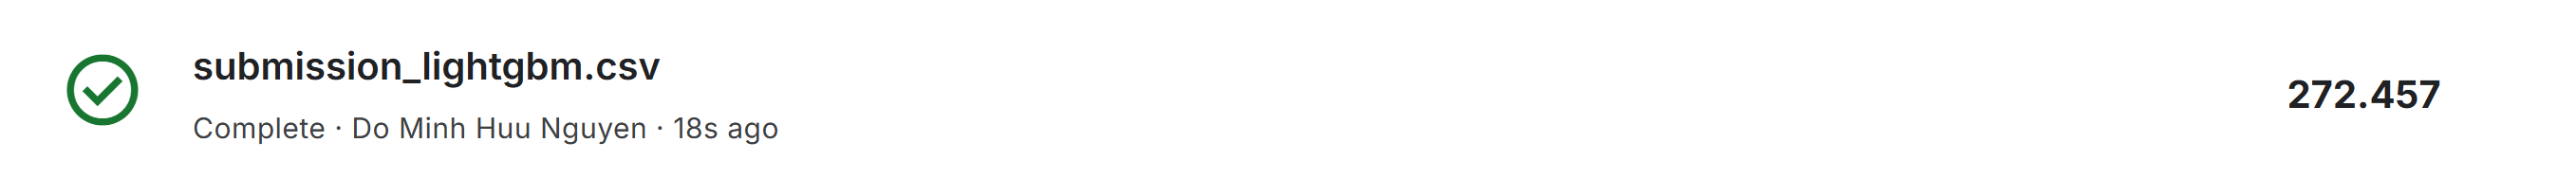

After submitting predictions from the LightGBM model to the Kaggle competition platform, the model achieved a test set score of 272.457. This score is significantly higher than the training MAE of approximately 82.59, indicating a clear gap in generalization between the training data and the unseen test data. This performance gap may be attributed to several factors, including potential overfitting on the training set, limitations in feature engineering, or distributional differences between the train and test sets.

Despite LightGBM being the strongest performer among the models evaluated, the Kaggle result suggests that there is substantial room for improvement in out-of-sample performance. Future iterations could focus on **stronger regularization**, **additional feature selection**, or **ensembling methods** to improve robustness and reduce overfitting.

### **5. Model Improvement**

#### **SUMMARY**

To enhance predictive accuracy, we constructed a stacking ensemble model combining both linear and tree-based base learners.

**Purpose of stacking:**

To leverage diverse learning patterns by combining models that capture both linear relationships (Ridge, Lasso, SVR) and non-linear interactions (LightGBM).

**Linear Models: Feature Selection and Training**
- Models involved: Ridge, Lasso, and SVR.
- Feature selection method:
Applied Recursive Feature Elimination (RFE) with Ridge as the estimator.
- Why Ridge?
  - Handles multicollinearity well.
  - Provides stable, coefficient-based feature importance.
- Optimal subset size:
Selected the top 70 features based on a trade-off between MAE and R² during validation.
- Application:
These 70 features were then used to train and tune the linear models individually before stacking.

**Tree-Based Model (LightGBM): SHAP-Driven Selection**
- Feature selection method:
Used SHAP values to rank feature importance specific to LightGBM.
- Optimal subset size:
Chose the top 60 SHAP-ranked features to reduce dimensionality without compromising performance.
- Application:
LightGBM was tuned using these 60 features to optimise non-linear modelling capability.

**Stacking**
- Each model generated out-of-fold predictions through five-fold cross-validation.
- Linear regression was chosen as the meta-learner due to its simplicity and ability to combine predictions without introducing further complexity.
- All models were trained using the appropriate inputs, with scaled features applied to linear models and unscaled features used for LightGBM.




#### **5.1 Linear Models - Hyperparameters Tuning**

In [ ]:
df_train = pd.read_csv('train_cleaned.csv')
df_test = pd.read_csv('test_cleaned.csv')

In [ ]:
df_train['price_log1p'] = np.log1p(df_train['price'])

In [ ]:
# This is to ensure that the result file has the same ID column as the original test set
df_test1 = df_test.copy()

##### **5.1.1 Feature Selection by using Ridge Model**

First, we evaluate how the number of selected features affects **Ridge regression performance.** We first scale all features and use the log-transformed price as the target. Then, for each value of k, we apply Recursive Feature Elimination (RFE) with Ridge as the estimator to select the top k features. Using 5-fold cross-validation, we compute the mean absolute error (MAE) to identify the optimal feature count for the models.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
X = df_train.drop(columns=['price', 'price_log1p', 'ID'])  # Exclude target and ID

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = all features
y = df_train['price_log1p']

# Loop to test different feature counts
for k in [20, 30, 40, 50, 70, 60, 80, 90, 100]:
    rfe = RFE(estimator=Ridge(alpha=1.0), n_features_to_select=k)
    rfe.fit(X_scaled, y)
    X_selected = X_scaled[:, rfe.support_]

    score = -np.mean(cross_val_score(Ridge(), X_selected, y, scoring='neg_mean_absolute_error', cv=5))
    print(f"MAE with {k} features: {score:.4f}")

**Output**
- MAE with 20 features: 0.3113
- MAE with 30 features: 0.2991
- MAE with 40 features: 0.2866
- MAE with 50 features: 0.2877
- MAE with 70 features: 0.2834
- MAE with 60 features: 0.2845
- MAE with 80 features: 0.2838
- MAE with 90 features: 0.2840
- MAE with 100 features: 0.2849

We chose to use **70 features** because it achieved the lowest cross-validated MAE (0.2834) among all tested feature counts. While models with 60, 80, and 90 features showed similar performance, 70 features offered **the best trade-off between model simplicity and accuracy.** Selecting this number allows the model to retain strong predictive power without introducing unnecessary complexity or risk of overfitting.

In [ ]:
# 1. Scale the features (required for Ridge)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define Ridge and RFE
ridge = Ridge(alpha=1.0, random_state=42)
rfe = RFE(estimator=ridge, n_features_to_select=70)
rfe.fit(X_scaled, y)

# 3. Get selected features
selected_feature_names = X.columns[rfe.support_]
selected_70 = selected_feature_names.tolist()

In [ ]:
# 4. Define seperate dataframe using for linear models
df_train_linear = df_train[selected_70]
df_test_linear = df_test[selected_70]

After identifying that using 70 features yields the best cross-validated performance, we extract this optimal subset using RFE. These selected features are then used to create new training and test DataFrames, which will serve as the input for hyperparameter tuning of the Ridge, Lasso, and SVR models. This ensures that all three linear models are trained and evaluated using only the most relevant predictors, improving efficiency and reducing the risk of overfitting.

##### **5.1.2 Training and Testing Set for Linear Models**

In [ ]:
# 1.Creating the train dataset
X_train1 = df_train_linear
y_train1 = df_train['price_log1p'].clip(upper=df_train['price_log1p'].quantile(0.99))

# 2.Creating the test dataset
X_test1 = df_test_linear.copy()

# 3. Creating the scaled training input
sc = StandardScaler()
sc.fit(X_train1)
X_train_scaled = sc.transform(X_train1)
X_test_scaled = sc.transform(X_test1)

In this step, we prepare the data for linear models by selecting the 70 RFE-chosen features and clipping the target variable at the 99th percentile to reduce the impact of outliers. We then apply StandardScaler to normalize the input features, which is essential for ensuring stable performance in models like Ridge, Lasso, and SVR.

##### **5.1.3 Ridge Tuning**

In [ ]:
# RIDGE:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error


#Defining the parameter grid for tuning hyperparameter alpha
param_grid_rdg = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55, 100, 110,120,130,140,150,200]}

#Creating instance of the Ridge model
rdg_model = Ridge()

#Using GridSearch Cross Validation
grid_search_rdg = GridSearchCV(estimator=rdg_model, param_grid=param_grid_rdg, cv=10, scoring='neg_mean_squared_error')
grid_search_rdg.fit(X_train_scaled, y_train1)

#Getting the best model and hyperparameters
best_rdg_model = grid_search_rdg.best_estimator_
best_params_rdg = grid_search_rdg.best_params_
print(best_params_rdg)

# Fit on Full Train Set & Predict on Test
best_rdg_model.fit(X_train_scaled, y_train1)
y_test_pred_log = best_rdg_model.predict(X_test_scaled)
y_test_pred_orig = np.expm1(y_test_pred_log)

# Save Predictions to Keggle Submission Format
df_test_rdg = pd.DataFrame({'ID': df_test1['ID'], 'pre_price': y_test_pred_orig})
df_test_rdg.to_csv('rdg_predicts.csv', index=False)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# === Custom RMSE Scorer on Original Price Scale ===
def r2_original(y_true_log, y_pred_log):
    return r2_score(np.expm1(y_true_log), np.expm1(y_pred_log))

def mae_original(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))

# rmse_scorer = make_scorer(rmse_original, greater_is_better=False)
r2_scorer = make_scorer(r2_original)
mae_scorer = make_scorer(mae_original, greater_is_better=False)

# Evaluate with 10-fold CV on original scale
# rmse_scores = -cross_val_score(best_lgbm, X_train, y_train, cv=10, scoring=rmse_scorer)
r2_scores = cross_val_score(best_rdg_model, X_train_scaled, y_train1, cv=10, scoring=r2_scorer)
mae_scores = -cross_val_score(best_rdg_model, X_train_scaled, y_train1, cv=10, scoring=mae_scorer)

# print("RMSE (original price scale) of light gbm:", np.mean(rmse_scores))
print("R2 (original price scale) of ridge:", np.mean(r2_scores))
print("MAE (original price scale) of ridge:", np.mean(mae_scores))

**Output**

- **Parameter:** 'alpha': 10
- **R2 (original price scale) of ridge:** 0.5031101294068947
- **MAE (original price scale) of ridge:** 64.77886533811757

##### **5.1.4 Lasso Tuning**

In [ ]:
# LASSO:
from sklearn.linear_model import Lasso

#Defining the parameter grid for tuning hyperparameter alpha levels
param_grid_lso = {'alpha':  [1e-15,1e-10,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,5, 10,15,20,25,30,35,40,45,50,55,100,110,120,130,140,150,200]}

#Creating instance of the Lasso model
lso_model = Lasso(max_iter=30)

#Using GridSearch Cross Validation
grid_search_lso = GridSearchCV(estimator=lso_model, param_grid=param_grid_lso, cv=10, scoring='neg_mean_squared_error')
grid_search_lso.fit(X_train_scaled, y_train1)

#Getting the best model and hyperparameters
best_lso_model = grid_search_lso.best_estimator_
best_params_lso = grid_search_lso.best_params_
print(best_params_lso)

#Fitting the best model on the training data
best_lso_model.fit(X_train_scaled, y_train1)


# Make predictions and TRANSFORM BACK to original scale
y_pred_lso = best_lso_model.predict(X_test_scaled)
y_pred_lso_orig = np.expm1(y_pred_lso)

#Using fitted model to create price prediction
ID = df_test1['ID']
predicted_prices = y_pred_lso_orig
df_test_las = pd.DataFrame({'ID': ID, 'price': predicted_prices})

#Make into CSV for Kaggle submission
df_test_las[['ID', 'price']].to_csv('lasso_predicts.csv', index=False)

# Step 6: Evaluate on original scale
def r2_original(y_true_log, y_pred_log):
    return r2_score(np.expm1(y_true_log), np.expm1(y_pred_log))

def mae_original(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))


# rmse_scorer = make_scorer(rmse_original, greater_is_better=False)
r2_scorer = make_scorer(r2_original)
mae_scorer = make_scorer(mae_original, greater_is_better=False)

# Evaluate with 10-fold CV on original scale
# rmse_scores = -cross_val_score(best_lgbm, X_train, y_train, cv=10, scoring=rmse_scorer)
r2_scores = cross_val_score(best_lso_model, X_train_scaled, y_train1, cv=10, scoring=r2_scorer)
mae_scores = -cross_val_score(best_lso_model, X_train_scaled, y_train1, cv=10, scoring=mae_scorer)

# print("RMSE (original price scale) of light gbm:", np.mean(rmse_scores))
print("R2 (original price scale) of LASSO:", np.mean(r2_scores))
print("MAE (original price scale) of LASSO:", np.mean(mae_scores))

**Output**
- **Parameter**: 'alpha': 0.0001
- **R2 (original price scale) of LASSO:** 0.3629169823861731
- **MAE (original price scale) of LASSO:** 68.0598915958639

##### **5.1.5 SVR Tuning**

In [ ]:
#SVR:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, loguniform

# 1. Your data: replace these with your real inputs
# X_train_scaled, X_test_scaled, y_train, df_test['ID']

# 2. Parameter distribution
param_dist_svr = {
    'C': loguniform(1e-1, 1e3),              # Try values from 0.1 to 1000 (log-scale)
    'epsilon': uniform(0.01, 1.0),           # Explore 0.01 to 1.01 for margin width
    'gamma': loguniform(1e-4, 1e0),          # Try gamma between 0.0001 and 1.0
    'kernel': ['rbf']                        # RBF is best for SVR in most cases
}

# 3. Initialize model
svr_model = SVR()

# 4. RandomizedSearchCV
random_search_svr = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_dist_svr,
    n_iter=40,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# 5. Fit the model
random_search_svr.fit(X_train_scaled, y_train1)

# 6. Best estimator
best_svr_model = random_search_svr.best_estimator_
print("Best SVR Parameters:", random_search_svr.best_params_)

# 7. Predict
y_pred_svr = best_svr_model.predict(X_test_scaled)
y_pred_svr_orig = np.expm1(y_pred_svr)

# 8. Save CSV
df_svr_preds = pd.DataFrame({
    'ID': df_test['ID'],
    'price': y_pred_svr_orig
})
df_svr_preds.to_csv('svr_optimized_predictions.csv', index=False)

# Step 6: Evaluate on original scale
def r2_original(y_true_log, y_pred_log):
    return r2_score(np.expm1(y_true_log), np.expm1(y_pred_log))

def mae_original(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))

# rmse_scorer = make_scorer(rmse_original, greater_is_better=False)
r2_scorer = make_scorer(r2_original)
mae_scorer = make_scorer(mae_original, greater_is_better=False)

# Evaluate with 10-fold CV on original scale
# rmse_scores = -cross_val_score(best_lgbm, X_train, y_train, cv=10, scoring=rmse_scorer)
r2_scores = cross_val_score(best_svr_model, X_train_scaled, y_train1, cv=10, scoring=r2_scorer)
mae_scores = -cross_val_score(best_svr_model, X_train_scaled, y_train1, cv=10, scoring=mae_scorer)

# print("RMSE (original price scale) of light gbm:", np.mean(rmse_scores))
print("R2 (original price scale) of SVR:", np.mean(r2_scores))
print("MAE (original price scale) of SVR:", np.mean(mae_scores))

**Output**
- **Parameters:**
{'C': 213.6832907235874, 'epsilon': 0.22233911067827616, 'gamma': 0.000533703276260396, 'kernel': 'rbf'}
- **R2 (original price scale) of SVR:** 0.5779571458034181
- **MAE (original price scale) of SVR:** 59.702816400181845

#### **5.2 Tree-based Model (LightGBM) - Hyperparameters Tuning**

##### **5.2.1 Training and Testing Set for LightGBM**

In [ ]:
# 1. Creating the train and test dataset
X_train = df_train.drop(['price_log1p', 'price', 'ID'], axis=1)
y_train = df_train['price_log1p'].clip(upper=df_train['price_log1p'].quantile(0.99))

X_test = df_test.drop(['ID'], axis=1)

In this step, we prepare the data for LightGBM by clipping the target variable at the 99th percentile to reduce the impact of outliers and normalising the input features.

##### **5.2.2 LightGBM Tuning**

In [ ]:
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# Step 1: Transform your target variable (CRITICAL)
# Log-transform target

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 10, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 50, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'objective': 'quantile',
        'alpha': 0.5,
        'random_state': 42,
        'verbose': -1
    }

    model = lgb.LGBMRegressor(**params)
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_mean_absolute_error',
        cv=KFold(n_splits=3, shuffle=True, random_state=42),
        n_jobs=-1
    )
    return -score.mean()

# Step 3: Hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=4) # change to 50

# Step 4: Train best model on log-transformed target
best_lgb = lgb.LGBMRegressor(**study.best_params)
best_lgb.fit(X_train, y_train)

print("Best LightGBM parameters:", study.best_params)
print("Best MAE (log scale):", study.best_value)

# Step 5: Make predictions and TRANSFORM BACK to original scale
y_pred_log_lightgbm = best_lgb.predict(X_test)
y_pred_lgbm_orig = np.expm1(y_pred_log_lightgbm)

# Step 6: Evaluate on original scale
def r2_original(y_true_log, y_pred_log):
    return r2_score(np.expm1(y_true_log), np.expm1(y_pred_log))

def mae_original(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))


# rmse_scorer = make_scorer(rmse_original, greater_is_better=False)
r2_scorer = make_scorer(r2_original)
mae_scorer = make_scorer(mae_original, greater_is_better=False)

# Evaluate with 10-fold CV on original scale
# rmse_scores = -cross_val_score(best_lgbm, X_train, y_train, cv=10, scoring=rmse_scorer)
r2_scores = cross_val_score(best_lgb, X_train, y_train, cv=10, scoring=r2_scorer)
mae_scores = -cross_val_score(best_lgb, X_train, y_train, cv=10, scoring=mae_scorer)

# print("RMSE (original price scale) of light gbm:", np.mean(rmse_scores))
print("R2 (original price scale) of light gbm:", np.mean(r2_scores))
print("MAE (original price scale) of light gbm:", np.mean(mae_scores))

# Step 7: Final predictions for submission
y_pred_final_log = best_lgb.predict(X_test)
y_pred_final = np.expm1(y_pred_final_log)

# Export to CSV
test_output = pd.DataFrame({
    'ID': df_test1['ID'],
    'predicted_price':y_pred_final
})
test_output.to_csv('lightgbm_all_features.csv', index=False)

print(f"\nFinal predictions exported:")
print(f"Price range: ${y_pred_final.min():.2f} - ${y_pred_final.max():.2f}")
print(f"Mean predicted price: ${y_pred_final.mean():.2f}")
print("All predictions are in NORMAL price scale (converted back from log)")

**Output**
- **Parameters:** {'n_estimators': 1224, 'max_depth': 17, 'learning_rate': 0.021751401821179205, 'num_leaves': 98, 'min_child_samples': 3, 'subsample': 0.9202230181838618, 'colsample_bytree': 0.7650452639483819, 'reg_alpha': 0.02655620220561339, 'reg_lambda': 1.95663191082746}
- **R2 (original price scale) of light gbm:** 0.6352935061583145
- **MAE (original price scale) of light gbm:** 54.327971443799285

##### **5.2.3 SHAP Values and Feature Chosen from Feature Importance**

In [ ]:
!pip install shap

In [ ]:
# 1. Using the SHAP values for feature importance
import shap
explainer = shap.Explainer(best_lgb, X_train)
shap_values = explainer(X_train)

In [ ]:
# 2. Choosing the top 60 features based on the mean absolute SHAP values per features
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': shap_importance
}).sort_values(by='importance', ascending=False)

# 3. Selecting top 60 features
top_60_features = shap_importance_df['feature'].head(60).tolist()

**Output - Top 60 features**

['accommodates',
 'bedrooms',
 'availability_30',
 'room_type_Private',
 'bathroom_count',
 'review_scores_rating',
 'review_scores_value',
 'review_scores_location',
 'dist_to_cbd',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_entire_homes',
 'availability_60',
 'cbd_view_interaction',
 'dist_to_beach',
 'days_since_last_review',
 'accommodates_sqrt',
 'availability_365',
 'longitude',
 'review_scores_cleanliness',
 'availability_90',
 'dist_to_mall',
 'bedrooms_sqrt',
 'property_type_Private room in home',
 'maximum_nights_avg_ntm',
 'instant_bookable',
 'room_type_Entire',
 'reviews_per_month',
 'number_of_reviews_ltm',
 'review_scores_accuracy',
 'host_listings_count',
 'number_of_reviews',
 'amenity_count',
 'bathroom_count_sqrt',
 'minimum_nights_avg_ntm',
 'property_type_Entire home',
 'calculated_host_listings_count',
 'has_pool',
 'review_scores_communication',
 'reviews_per_day',
 'number_of_reviews_l30d',
 'has_coffee_maker',
 'crowding_index',
 'host_experience_days',
 'minimum_nights',
 'latitude',
 'days_since_first_review',
 'host_acceptance_rate',
 'maximum_minimum_nights',
 'luxury_amenity_count',
 'has_high_quality_bedding',
 'has_private_balcony',
 'minimum_minimum_nights',
 'maximum_nights',
 'dist_to_cbd_sq',
 'review_scores_checkin',
 'rating_review_volume',
 'dist_to_mall_log1p',
 'host_response_time',
 'dist_to_beach_log1p',
 'minimum_maximum_nights']

##### **5.2.4 LightGBM Tuning with top 60 features**

In [ ]:
# 1. Creating the train and test dataset
df_train2 = df_train[top_60_features + ['price_log1p']]
df_test2 = df_test[top_60_features]

# 2. Extracting the input and target variables
X_train = df_train2.drop(['price_log1p'], axis=1)
y_train = df_train2['price_log1p'].clip(upper=df_train['price_log1p'].quantile(0.99))

X_test = df_test2.copy()

In [ ]:
# 3. Training the LightGBM model with the top 60 features
import lightgbm as lgb
import optuna
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# Step 1: Transform your target variable (CRITICAL)
# Log-transform target

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'max_depth': trial.suggest_int('max_depth', 10, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 50, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'objective': 'quantile',
        'alpha': 0.5,
        'random_state': 42,
        'verbose': -1
    }

    model = lgb.LGBMRegressor(**params)
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_mean_absolute_error',
        cv=KFold(n_splits=3, shuffle=True, random_state=42),
        n_jobs=-1
    )
    return -score.mean()

# Step 3: Hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=4) # change to 50

# Step 4: Train best model on log-transformed target
best_lgb = lgb.LGBMRegressor(**study.best_params)
best_lgb.fit(X_train, y_train)

print("Best LightGBM parameters:", study.best_params)
print("Best MAE (log scale):", study.best_value)

# Step 5: Make predictions and TRANSFORM BACK to original scale
y_pred_log_lightgbm = best_lgb.predict(X_test)
y_pred_lgbm_orig = np.expm1(y_pred_log_lightgbm)

# Step 6: Evaluate on original scale
def r2_original(y_true_log, y_pred_log):
    return r2_score(np.expm1(y_true_log), np.expm1(y_pred_log))

def mae_original(y_true_log, y_pred_log):
    return mean_absolute_error(np.expm1(y_true_log), np.expm1(y_pred_log))


# rmse_scorer = make_scorer(rmse_original, greater_is_better=False)
r2_scorer = make_scorer(r2_original)
mae_scorer = make_scorer(mae_original, greater_is_better=False)

# Evaluate with 10-fold CV on original scale
# rmse_scores = -cross_val_score(best_lgbm, X_train, y_train, cv=10, scoring=rmse_scorer)
r2_scores = cross_val_score(best_lgb, X_train, y_train, cv=10, scoring=r2_scorer)
mae_scores = -cross_val_score(best_lgb, X_train, y_train, cv=10, scoring=mae_scorer)

# print("RMSE (original price scale) of light gbm:", np.mean(rmse_scores))
print("R2 (original price scale) of light gbm_top60:", np.mean(r2_scores))
print("MAE (original price scale) of light gbm_top60:", np.mean(mae_scores))

# Step 7: Final predictions for submission
y_pred_final_log = best_lgb.predict(X_test)
y_pred_final = np.expm1(y_pred_final_log)

# Export to CSV
test_output = pd.DataFrame({
    'ID': df_test1['ID'],
    'predicted_price':y_pred_final
})
test_output.to_csv('lightgbm_top60_features.csv', index=False)

print(f"\nFinal predictions exported:")
print(f"Price range: ${y_pred_final.min():.2f} - ${y_pred_final.max():.2f}")
print(f"Mean predicted price: ${y_pred_final.mean():.2f}")
print("All predictions are in NORMAL price scale (converted back from log)")

- **Parameters:**
{'n_estimators': 1432, 'max_depth': 16, 'learning_rate': 0.06284122674542761, 'num_leaves': 68, 'min_child_samples': 6, 'subsample': 0.6561264774523239, 'colsample_bytree': 0.723696215058131, 'reg_alpha': 0.3464196295537766, 'reg_lambda': 2.3492174709713325}.
- **R2 (original price scale) of light gbm_top60:** 0.6419713000086213
- **MAE (original price scale) of light gbm_top60:** 54.25290335494162



**Output**
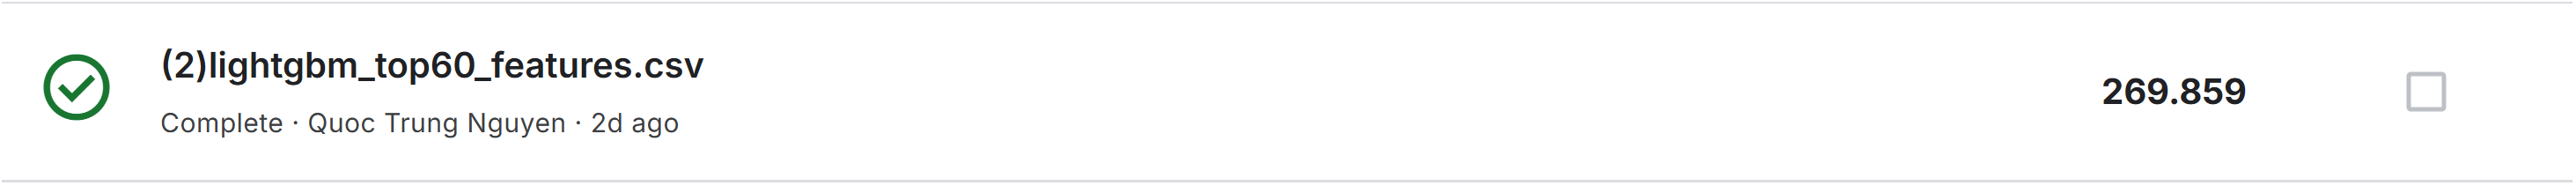

The LightGBM model using all features achieved a Kaggle test score of 272.457, while the version trained on the top 60 features selected via SHAP yielded a lower score, indicating improved performance on the unseen test set. This improvement suggests that removing less important or noisy features helped the model generalize better, reduced overfitting, and focused learning on the most informative variables. Despite having fewer inputs, the SHAP-guided feature selection allowed the model to maintain predictive power while enhancing robustness on external data.

#### **5.3 Stacking Models**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- STEP 1: Setup placeholders for predictions ---

n_train = X_train_scaled.shape[0]
n_test = X_test_scaled.shape[0]

# Placeholders for OOF training predictions
oof_preds_ridge = np.zeros(n_train)
oof_preds_lasso = np.zeros(n_train)
oof_preds_svr = np.zeros(n_train)
oof_preds_lgbm = np.zeros(n_train)

# Placeholders for final test predictions
test_preds_ridge = np.zeros(n_test)
test_preds_lasso = np.zeros(n_test)
test_preds_svr = np.zeros(n_test)
test_preds_lgbm = np.zeros(n_test)

# --- STEP 2: K-Fold CV for Base Models ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train_scaled):
    # === Prepare data ===
    X_tr_scaled, X_val_scaled = X_train_scaled[train_idx], X_train_scaled[val_idx]
    X_tr_raw, X_val_raw = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr = y_train.iloc[train_idx]

    # === Train models ===
    best_rdg_model.fit(X_tr_scaled, y_tr)
    best_lso_model.fit(X_tr_scaled, y_tr)
    best_svr_model.fit(X_tr_scaled, y_tr)
    best_lgb.fit(X_tr_raw, y_tr)

    # === Predict on validation fold ===
    oof_preds_ridge[val_idx] = best_rdg_model.predict(X_val_scaled)
    oof_preds_lasso[val_idx] = best_lso_model.predict(X_val_scaled)
    oof_preds_svr[val_idx]   = best_svr_model.predict(X_val_scaled)
    oof_preds_lgbm[val_idx]  = best_lgb.predict(X_val_raw)

# --- STEP 3: Refit all base models on full training data ---
best_rdg_model.fit(X_train_scaled, y_train)
best_lso_model.fit(X_train_scaled, y_train)
best_svr_model.fit(X_train_scaled, y_train)
best_lgb.fit(X_train, y_train)

# --- STEP 4: Predict on test set ---
test_preds_ridge = best_rdg_model.predict(X_test_scaled)
test_preds_lasso = best_lso_model.predict(X_test_scaled)
test_preds_svr   = best_svr_model.predict(X_test_scaled)
test_preds_lgbm  = best_lgb.predict(X_test)

# --- STEP 5: Stack predictions to form input for meta-model ---
stacked_train = np.column_stack([
    oof_preds_ridge,
    oof_preds_lasso,
    oof_preds_svr,
    oof_preds_lgbm
])

stacked_test = np.column_stack([
    test_preds_ridge,
    test_preds_lasso,
    test_preds_svr,
    test_preds_lgbm
])

# --- STEP 6: Train meta-model ---
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# --- STEP 7: Predict final result on test set ---
final_log_preds = meta_model.predict(stacked_test)
final_price_preds = np.expm1(final_log_preds)  # Inverse log1p

# --- STEP 8: Evaluate on training set ---
stacked_oof_preds = meta_model.predict(stacked_train)

# On log scale
mae_log = mean_absolute_error(y_train, stacked_oof_preds)
r2_log = r2_score(y_train, stacked_oof_preds)

# On price scale
true_price = np.expm1(y_train)
pred_price = np.expm1(stacked_oof_preds)

mae_price = mean_absolute_error(true_price, pred_price)
r2_price = r2_score(true_price, pred_price)

print("Stacking Performance on Training Set:")
print(f"MAE (log scale): {mae_log:.4f}")
print(f"R²   (log scale): {r2_log:.4f}")
print(f"MAE (price): {mae_price:.2f}")
print(f"R²   (price): {r2_price:.4f}")

# --- STEP 9: Export predictions ---
test_output = pd.DataFrame({
    'ID': df_test1['ID'],
    'predicted_price': final_price_preds
})
test_output.to_csv('(16)stacking_ridge_lasso_svr_lgbm.csv', index=False)

To enhance prediction accuracy, we implemented a stacking ensemble model that combines multiple tuned base learners: **Ridge, Lasso, SVR, and LightGBM.** Each of these models had been previously optimized through hyperparameter tuning using Optuna, ensuring that they perform as effectively as possible within the ensemble.

We used **5-fold cross-validation to generate out-of-fold (OOF) predictions** from each base model. For each fold, the models were trained on 80% of the data and validated on the remaining 20%, allowing us to construct robust OOF predictions for the entire training set (with 70 features indicated by Ridge Model). These predictions were used as features for training a meta-model, while the corresponding test set predictions were averaged across folds.

Preprocessing was handled carefully to match each model’s needs: standardized features were used for the linear models (Ridge, Lasso, SVR), while raw features were retained for the tree-based LightGBM model. After generating the OOF and test predictions, we stacked them horizontally to form new meta-level training and test datasets.

**A Linear Regression model was selected as the meta-learner.** It was trained on the stacked training predictions and used to produce the final forecast on the test set. Since the target was log-transformed, the predictions were exponentiated (np.expm1) to return to the original price scale. We also reported ensemble performance using MAE and R² on both the log and actual price scales. The final predictions were saved in a CSV file for Kaggle submission.



#### **5.4 Kaggle Submission Result**

**Output**
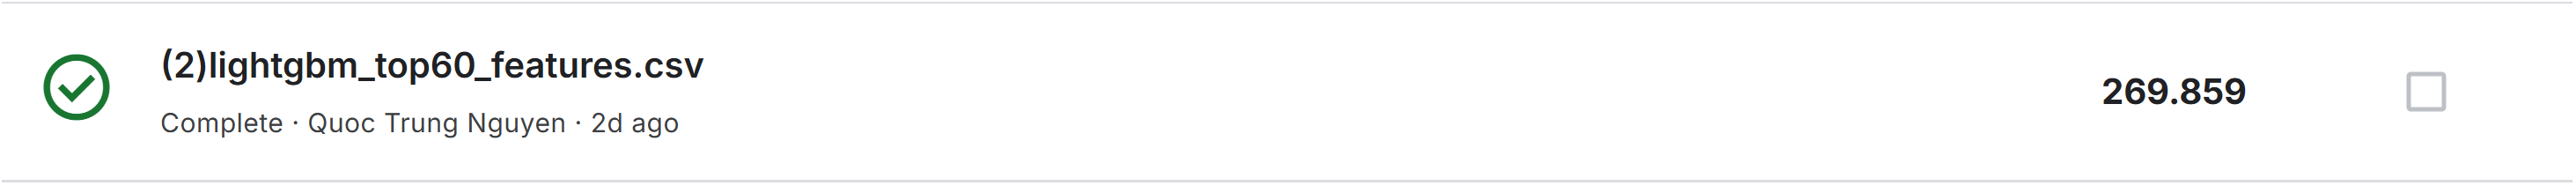

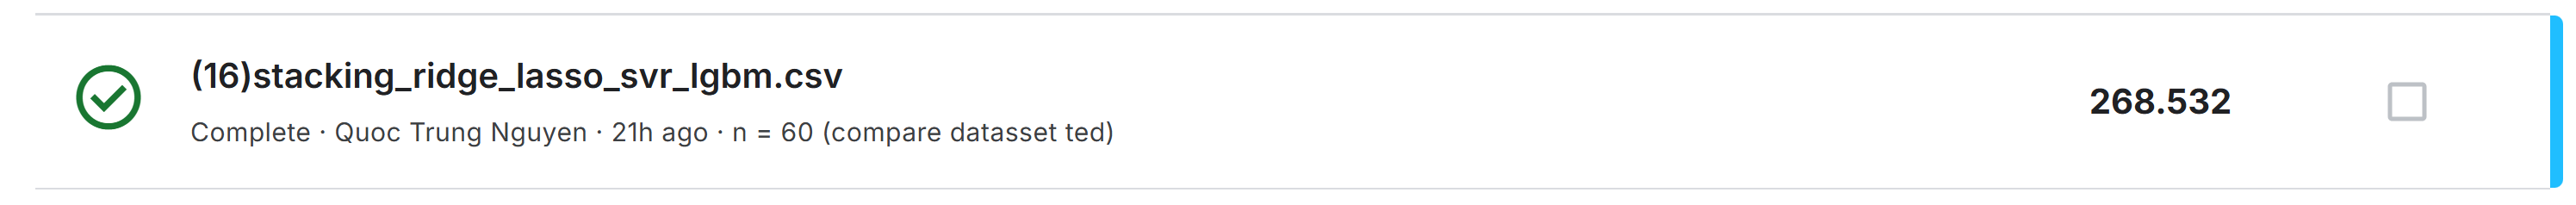

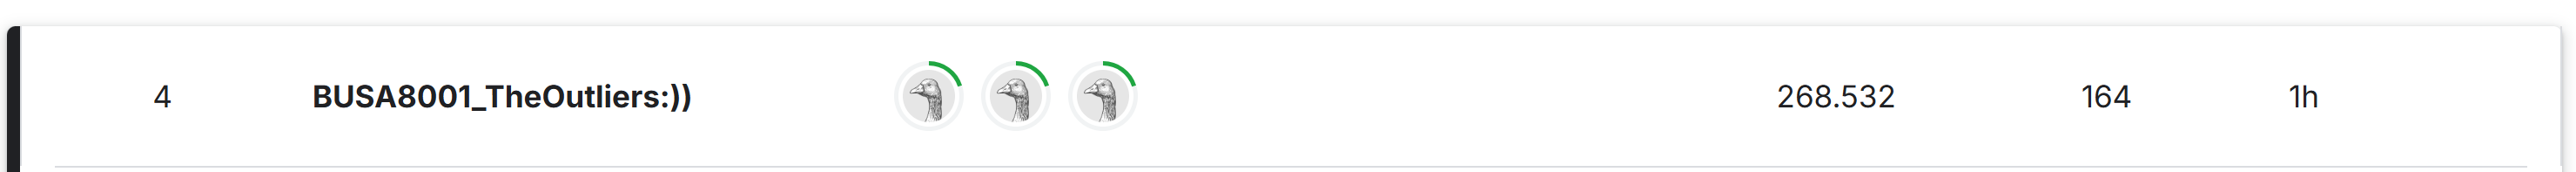

**The stacking model achieved a Kaggle score of 268.532**, outperforming both the LightGBM model trained on all features **(score: 272.457)** and the LightGBM model using the top 60 SHAP-selected features **(score: 269.859)**. This helped us rank fourth in the competition.

While the 60-feature LightGBM model showed improvement by reducing overfitting and focusing on relevant variables, the stacking approach further enhanced performance by combining complementary strengths from multiple tuned models, including Ridge, Lasso, SVR, and LightGBM. This combination allowed the ensemble to better capture diverse data patterns, resulting in improved generalization on the test set. The lower test error and higher ranking serve as strong evidence of stacking’s effectiveness over individual models, even when those models were optimized and feature-reduced.

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---